In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **1)Data Acquisition and Inspection**

In [13]:
df = pd.read_csv("school.csv", low_memory=False)

In [15]:
df

X          Y  OBJECTID       NCESSCH   SURVYEAR STABR  \
0      -86.206200  34.260200         1   10000500870  2022-2023    AL   
1      -86.204900  34.262200         2   10000500871  2022-2023    AL   
2      -86.220100  34.273300         3   10000500879  2022-2023    AL   
3      -86.221806  34.252700         4   10000500889  2022-2023    AL   
4      -86.193300  34.289800         5   10000501616  2022-2023    AL   
...           ...        ...       ...           ...        ...   ...   
101385 -64.917602  18.341950    101386  780003000024  2022-2023    VI   
101386 -64.952483  18.338742    101387  780003000026  2022-2023    VI   
101387 -64.899024  18.354782    101388  780003000027  2022-2023    VI   
101388 -64.945940  18.336658    101389  780003000033  2022-2023    VI   
101389 -64.890311  18.318230    101390  780003000034  2022-2023    VI   

          LEAID ST_LEAID                                   LEA_NAME  \
0        100005   AL-101                           Albertville City   
1        100005   AL-101                           Albertville City   
2        100005   AL-101                           Albertville City   
3        100005   AL-101                           Albertville City   
4        100005   AL-101                           Albertville City   
...         ...      ...                                        ...   
101385  7800030   VI-001  Saint Thomas - Saint John School District   
101386  7800030   VI-001  Saint Thomas - Saint John School District   
101387  7800030   VI-001  Saint Thomas - Saint John School District   
101388  7800030   VI-001  Saint Thomas - Saint John School District   
101389  7800030   VI-001  Saint Thomas - Saint John School District   

                                 SCH_NAME  ...  HIALF     HI TRALM TRALF  \
0               Albertville Middle School  ...  251.0  502.0  17.0  15.0   
1                 Albertville High School  ...  468.0  958.0  26.0  19.0   
2         Albertville Intermediate School  ...  241.0  504.0   7.0   6.0   
3           Albertville Elementary School  ...  236.0  497.0  11.0  16.0   
4       Albertville Kindergarten and PreK  ...  152.0  319.0   4.0   4.0   
...                                   ...  ...    ...    ...   ...   ...   
101385         LOCKHART ELEMENTARY SCHOOL  ...   30.0   63.0   1.0   2.0   
101386    ULLA F MULLER ELEMENTARY SCHOOL  ...   27.0   54.0   2.0   0.0   
101387    YVONNE BOWSKY ELEMENTARY SCHOOL  ...   22.0   59.0   0.0   1.0   
101388         CANCRYN JUNIOR HIGH SCHOOL  ...   62.0  136.0   0.0   1.0   
101389       BERTHA BOSCHULTE JUNIOR HIGH  ...   21.0   48.0   0.0   0.0   

          TR  WHALM  WHALF     WH     LATCOD     LONCOD  
0       32.0  168.0  147.0  315.0  34.260200 -86.206200  
1       45.0  325.0  316.0  641.0  34.262200 -86.204900  
2       13.0  154.0  144.0  298.0  34.273300 -86.220100  
3       27.0  168.0  136.0  304.0  34.252700 -86.221806  
4        8.0  104.0  120.0  224.0  34.289800 -86.193300  
...      ...    ...    ...    ...        ...        ...  
101385   3.0    1.0    0.0    1.0  18.341950 -64.917602  
101386   2.0    2.0    5.0    7.0  18.338742 -64.952483  
101387   1.0    8.0    4.0   12.0  18.354782 -64.899024  
101388   1.0    6.0   10.0   16.0  18.336658 -64.945940  
101389   0.0    0.0    2.0    2.0  18.318230 -64.890311  

[101390 rows x 77 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101390 entries, 0 to 101389
Data columns (total 77 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 101390 non-null  float64
 1   Y                 101390 non-null  float64
 2   OBJECTID          101390 non-null  int64  
 3   NCESSCH           101390 non-null  int64  
 4   SURVYEAR          101390 non-null  object 
 5   STABR             101390 non-null  object 
 6   LEAID             101390 non-null  int64  
 7   ST_LEAID          101390 non-null  object 
 8   LEA_NAME          101390 non-null  object 
 9   SCH_NAME          101390 non-null  object 
 10  LSTREET1          101389 non-null  object 
 11  LSTREET2          572 non-null     object 
 12  LCITY             101390 non-null  object 
 13  LSTATE            101390 non-null  object 
 14  LZIP              101390 non-null  int64  
 15  LZIP4             101390 non-null  object 
 16  PHONE             10

In [20]:
missing_values = df.isnull().sum()
missing_values

X              0
Y              0
OBJECTID       0
NCESSCH        0
SURVYEAR       0
            ... 
WHALM       2481
WHALF       2481
WH          2480
LATCOD         0
LONCOD         0
Length: 77, dtype: int64

In [22]:
# Missing values in the dataset
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values
missing_data = pd.DataFrame({'Column Name': df.columns, 'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Filter out columns with no missing values

missing_data

Column Name  Missing Values  Percentage
LSTREET1      LSTREET1               1    0.000986
LSTREET2      LSTREET2          100818   99.435842
PK                  PK           68998   68.052076
KG                  KG           47329   46.680146
G01                G01           46978   46.333958
G02                G02           46921   46.277739
G03                G03           46931   46.287602
G04                G04           47132   46.485847
G05                G05           48376   47.712792
G06                G06           63367   62.498274
G07                G07           68166   67.231482
G08                G08           67898   66.967157
G09                G09           73289   72.284249
G10                G10           73501   72.493343
G11                G11           73502   72.494329
G12                G12           73574   72.565342
G13                G13          101257   99.868823
UG                  UG           93501   92.219154
AE                  AE          101207   99.819509
TOTMENROL    TOTMENROL            2480    2.446001
TOTFENROL    TOTFENROL            2480    2.446001
TOTAL            TOTAL            1671    1.648092
MEMBER          MEMBER            1671    1.648092
FTE                FTE            3853    3.800178
STUTERATIO  STUTERATIO            1814    1.789131
AMALM            AMALM            2581    2.545616
AMALF            AMALF            2579    2.543643
AM                  AM            2533    2.498274
ASALM            ASALM            2492    2.457836
ASALF            ASALF            2490    2.455863
AS                  AS            2484    2.449946
BLALM            BLALM            2494    2.459809
BLALF            BLALF            2497    2.462768
BL                  BL            2487    2.452905
HPALM            HPALM            2608    2.572246
HPALF            HPALF            2607    2.571259
HP                  HP            2561    2.525890
HIALM            HIALM            2481    2.446987
HIALF            HIALF            2480    2.446001
HI                  HI            2480    2.446001
TRALM            TRALM            2487    2.452905
TRALF            TRALF            2485    2.450932
TR                  TR            2484    2.449946
WHALM            WHALM            2481    2.446987
WHALF            WHALF            2481    2.446987
WH                  WH            2480    2.446001

In [28]:
# Detecting Duplicates
duplicates = df.duplicated().sum()
duplicates

0

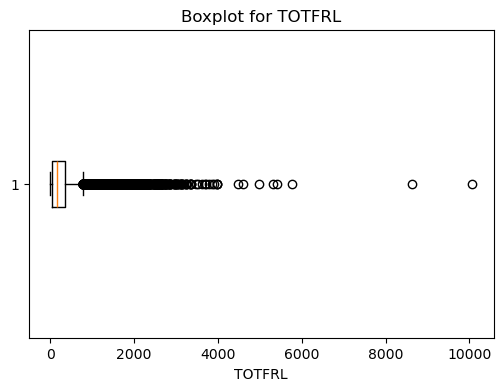

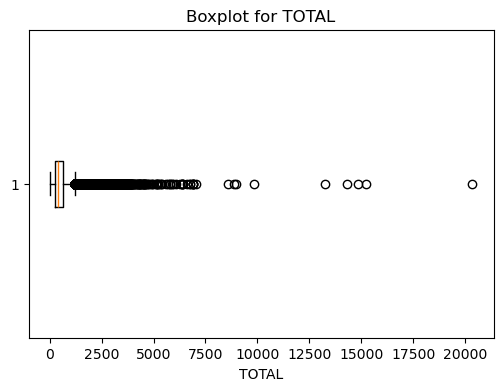

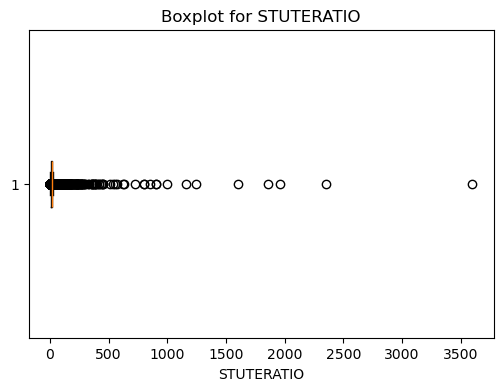

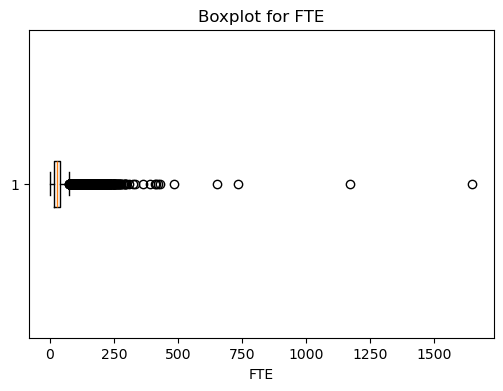

In [30]:
# Checking for Outliers
import matplotlib.pyplot as plt

# Step 4: Checking for Outliers using Boxplots

# Selecting numeric columns relevant for outlier detection
outlier_columns = ['TOTFRL', 'TOTAL', 'STUTERATIO', 'FTE']

# Creating boxplots for each selected column
for col in outlier_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [32]:
# Validating Data Consistency

# Checking unique values in categorical columns for consistency
state_codes_valid = df['STABR'].nunique()  # Should match the number of US states
zip_code_validity = df['LZIP'].astype(str).str.len().value_counts()  # Zip codes should have length 5
enrollment_validity = df['TOTAL'] - df[[f'G{str(i).zfill(2)}' for i in range(1, 13)]].sum(axis=1)  # TOTAL should match sum of grades

# Checking latitude and longitude validity (should be within US bounds)
lat_valid = df['LATCOD'].between(24, 50).all()  # US latitude range
lon_valid = df['LONCOD'].between(-125, -65).all()  # US longitude range

# Creating a summary dataframe for validation checks
validation_results = pd.DataFrame({
    "Check": [
        "Number of Unique State Codes",
        "Valid Zip Code Lengths",
        "Enrollment Sum Consistency",
        "Latitude Validity",
        "Longitude Validity"
    ],
    "Result": [
        state_codes_valid,
        zip_code_validity.to_dict(),
        (enrollment_validity.abs() < 5).sum(),  # Count of rows where difference is within reasonable tolerance
        lat_valid,
        lon_valid
    ]
})
validation_results

Check                       Result
0  Number of Unique State Codes                           56
1        Valid Zip Code Lengths  {5: 93357, 4: 7153, 3: 880}
2    Enrollment Sum Consistency                        44040
3             Latitude Validity                        False
4            Longitude Validity                        False

### **2)Data Cleaning and Preparation**

#### **Handling Missing Data, Duplicates, and Inconsistencies**

In [55]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Drop columns with excessive missing values (>90% missing)
threshold = 0.9 * len(df)
df_cleaned = df.dropna(axis=1, thresh=threshold).copy()  # Ensure a copy is created

# Impute missing values
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Fill missing values: Numeric with median, Categorical with mode
df_cleaned.loc[:, numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
df_cleaned.loc[:, categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Remove Duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Standardizing Zip Codes (ensuring 5-digit format)
df_cleaned.loc[:, 'LZIP'] = df_cleaned['LZIP'].astype(str).str.zfill(5)

# Filtering out invalid latitude and longitude values
df_cleaned = df_cleaned[
    df_cleaned['LATCOD'].between(24, 50) & df_cleaned['LONCOD'].between(-125, -65)
]

# Ensuring total enrollment matches sum of grade-level enrollments (using available columns)
existing_grade_columns = [col for col in df_cleaned.columns if col.startswith('G')]
if existing_grade_columns:
    df_cleaned.loc[:, 'TOTAL'] = df_cleaned[existing_grade_columns].sum(axis=1)

/var/folders/9s/yw8cfs3d31z7gj160zczq5v00000gn/T/ipykernel_5035/565076889.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['35950' '35950' '35950' ... '00802' '00804' '00802']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, 'LZIP'] = df_cleaned['LZIP'].astype(str).str.zfill(5)
/var/folders/9s/yw8cfs3d31z7gj160zczq5v00000gn/T/ipykernel_5035/565076889.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0708' '0912' '0506' ... 'KG12' '0612' '0106']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, 'TOTAL'] = df_cleaned[existing_grade_columns].sum(axis=1)


#### **Data Type Conversions and Normalization**

In [57]:
# Convert object columns with numeric data to proper numeric type where possible
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        try:
            df_cleaned[col] = pd.to_numeric(df_cleaned[col])
        except ValueError:
            continue  # Skip non-numeric columns

# Identify numeric columns again after conversion
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns using Min-Max Scaling
scaler = MinMaxScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

#### **Encode Categorical Data**

In [60]:
# Identify categorical columns for encoding
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoder for reference

In [62]:
df_cleaned

X         Y  OBJECTID       NCESSCH  SURVYEAR  STABR     LEAID  \
0       0.666645  0.391394   0.00000  0.000000e+00         0      0  0.000000   
1       0.666667  0.391474   0.00001  1.724083e-12         0      0  0.000000   
2       0.666404  0.391922   0.00002  1.551672e-11         0      0  0.000000   
3       0.666374  0.391091   0.00003  3.275752e-11         0      0  0.000000   
4       0.666869  0.392587   0.00004  1.286164e-09         0      0  0.000000   
...          ...       ...       ...           ...       ...    ...       ...   
100396  0.619406  0.333837   0.99996  9.999990e-01         0     23  0.999999   
100397  0.295244  0.422911   0.99997  9.999991e-01         0     30  0.999999   
100398  0.554906  0.703204   0.99998  9.999993e-01         0     10  0.999999   
100399  0.134111  0.371734   0.99999  9.999995e-01         0      3  0.999999   
100400  0.505120  0.416564   1.00000  1.000000e+00         0     34  1.000000   

        ST_LEAID  LEA_NAME  SCH_NAME  ...     HIALF        HI     TRALM  \
0             67       450      2212  ...  0.064641  0.072817  0.009918   
1             67       450      2209  ...  0.120525  0.138961  0.015169   
2             67       450      2210  ...  0.062065  0.073107  0.004084   
3             67       450      2208  ...  0.060778  0.072092  0.006418   
4             67       450      2211  ...  0.039145  0.046272  0.002334   
...          ...       ...       ...  ...       ...       ...       ...   
100396      1282      1216      5290  ...  0.000000  0.000000  0.000000   
100397      1161      6894     33044  ...  0.000000  0.000000  0.000000   
100398      1236     10324     51033  ...  0.000000  0.000000  0.000000   
100399      1251     11380     55307  ...  0.000000  0.000000  0.000000   
100400      1137      7963     39461  ...  0.000000  0.000000  0.000000   

           TRALF        TR     WHALM     WHALF        WH    LATCOD    LONCOD  
0       0.009690  0.009810  0.029289  0.024739  0.026974  0.391394  0.666645  
1       0.012274  0.013795  0.056660  0.053181  0.054890  0.391474  0.666667  
2       0.003876  0.003985  0.026848  0.024234  0.025518  0.391922  0.666404  
3       0.010336  0.008277  0.029289  0.022888  0.026032  0.391091  0.666374  
4       0.002584  0.002452  0.018131  0.020195  0.019181  0.392587  0.666869  
...          ...       ...       ...       ...       ...       ...       ...  
100396  0.000000  0.000000  0.000000  0.000000  0.000000  0.333837  0.619406  
100397  0.000000  0.000000  0.000000  0.000000  0.000000  0.422911  0.295244  
100398  0.000000  0.000000  0.000000  0.000000  0.000000  0.703204  0.554906  
100399  0.000000  0.000000  0.000000  0.000000  0.000000  0.371734  0.134111  
100400  0.000000  0.000000  0.000000  0.000000  0.000000  0.416564  0.505120  

[99604 rows x 59 columns]

### **3)Exploratory Data Analysis (EDA) Using Seaborn**

In [65]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

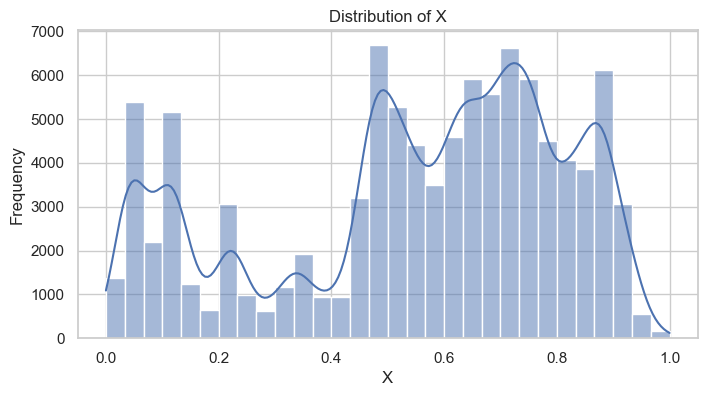

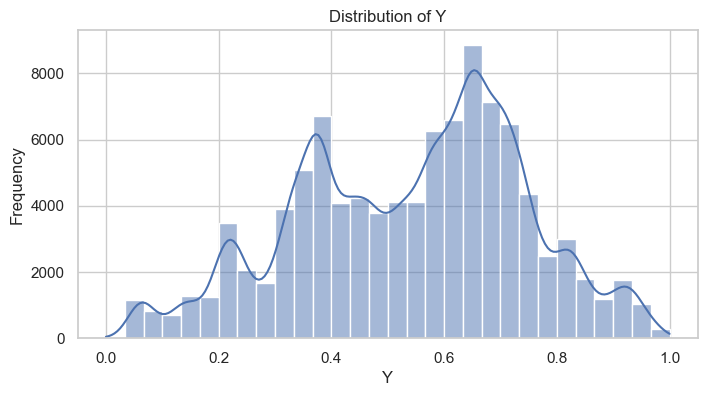

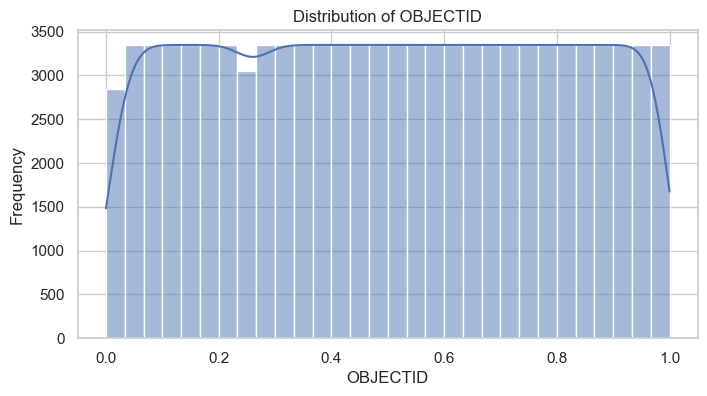

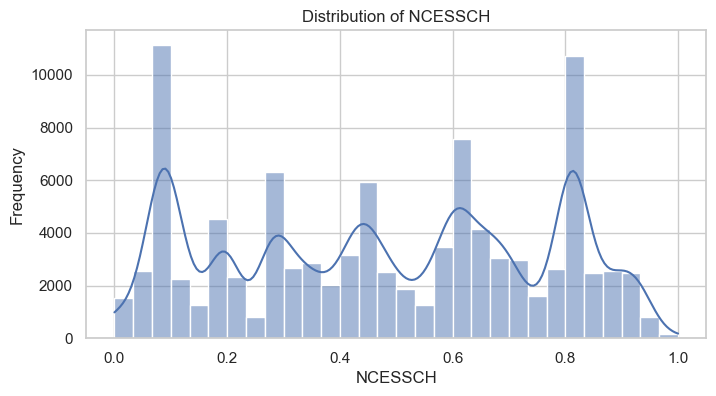

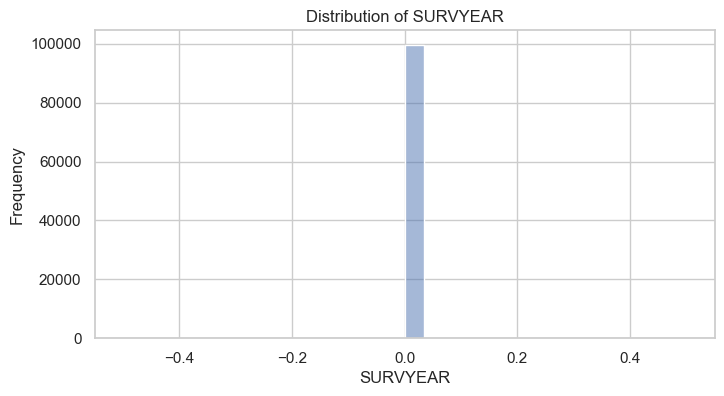

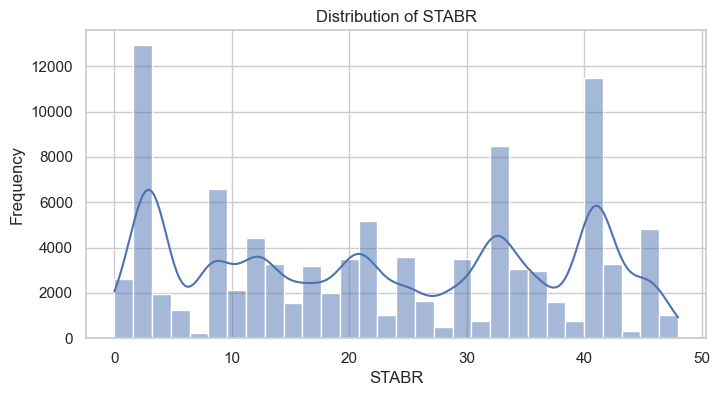

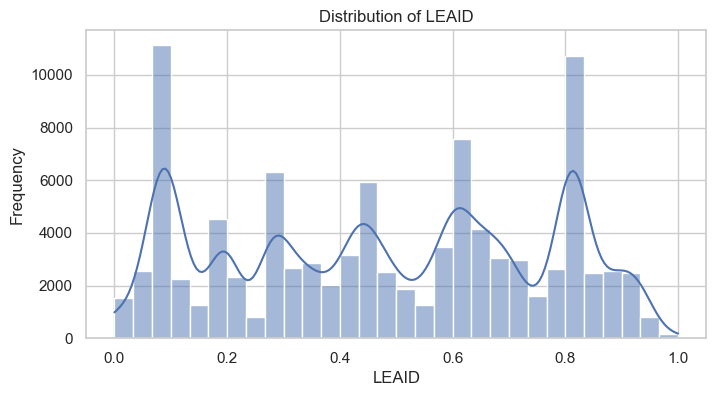

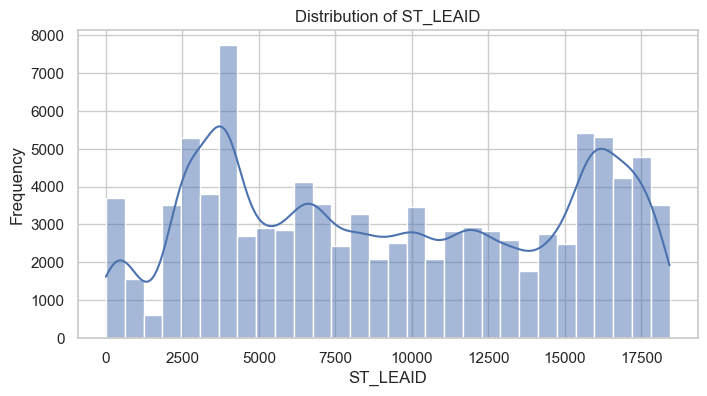

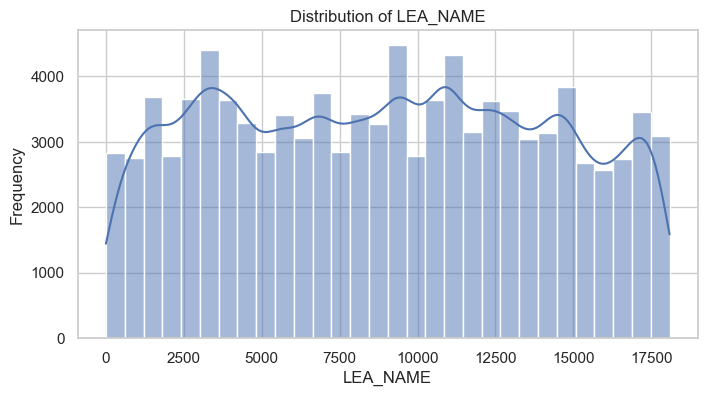

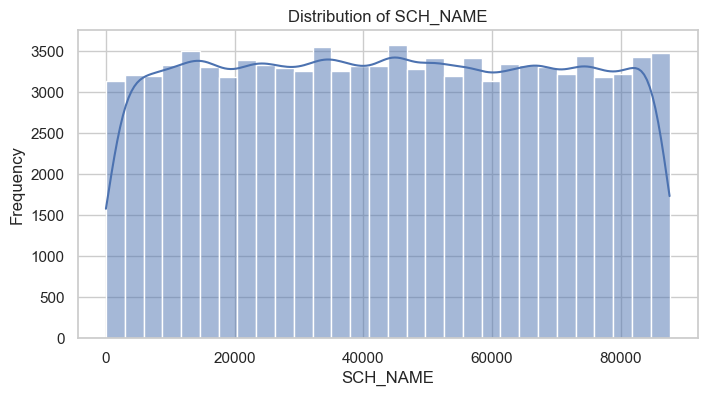

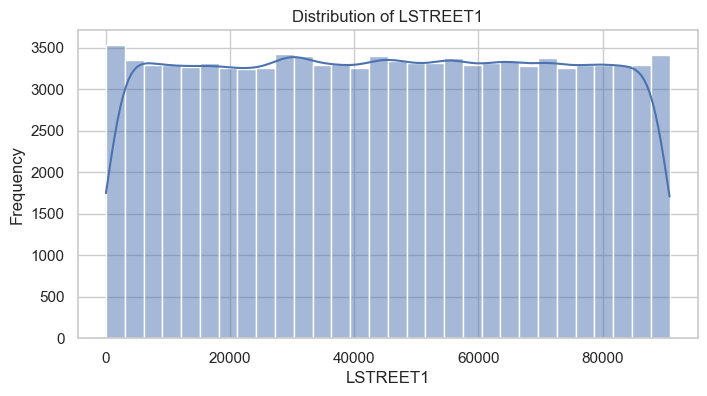

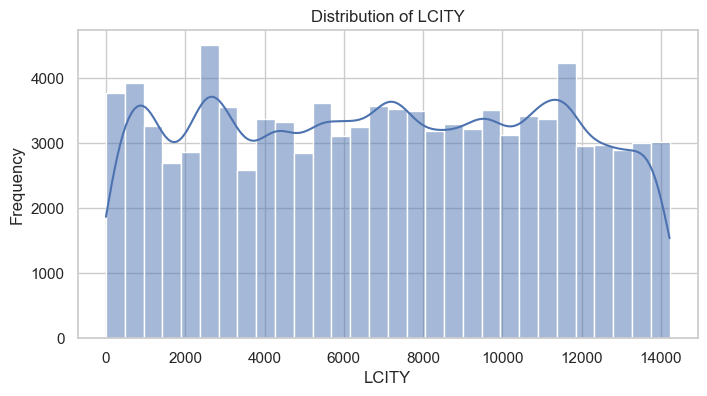

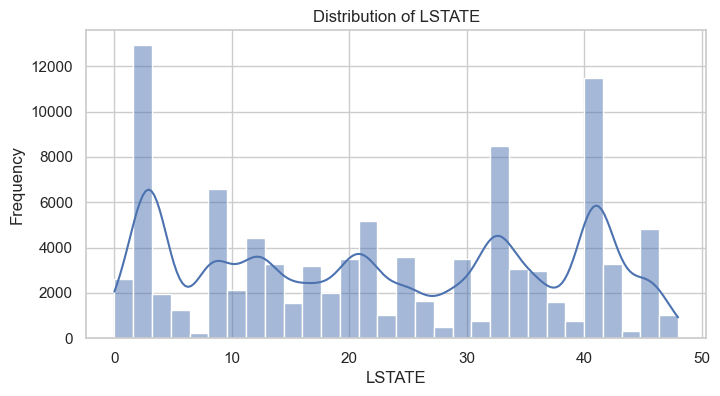

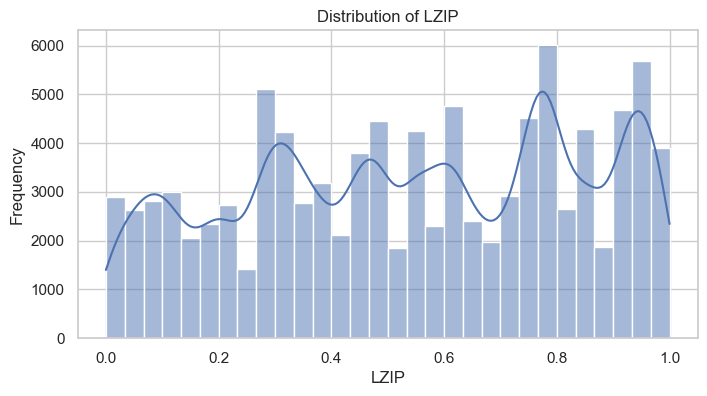

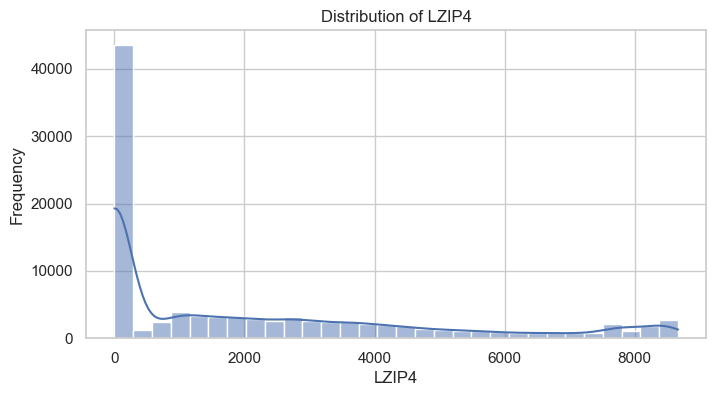

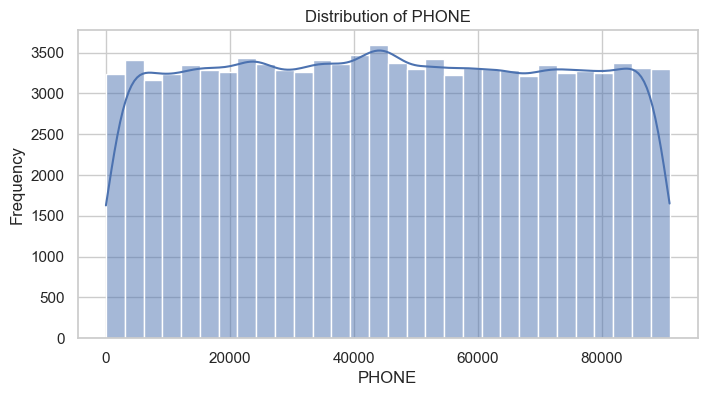

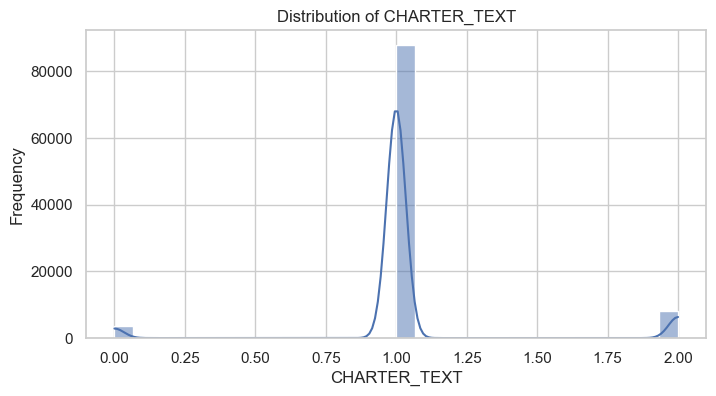

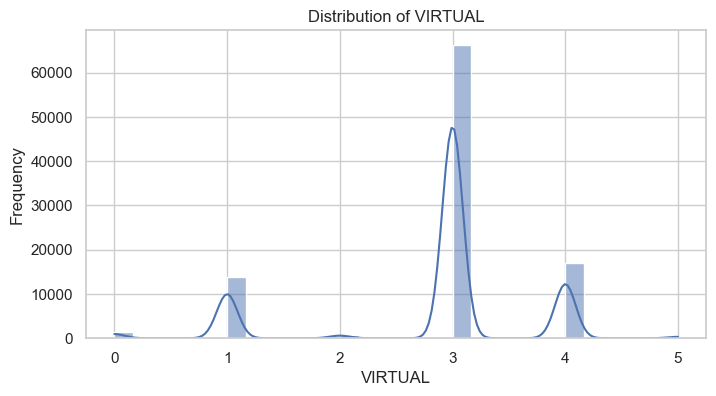

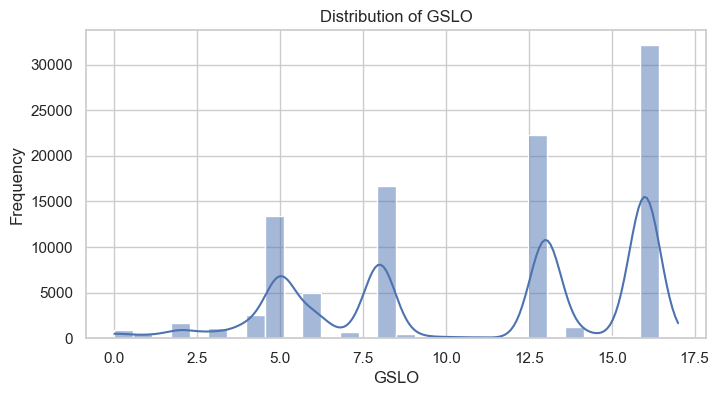

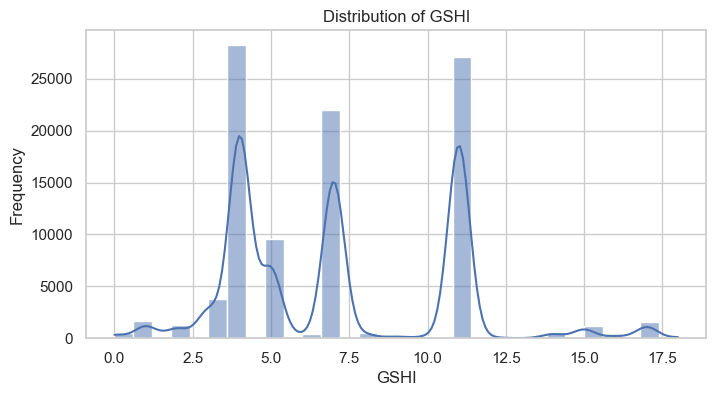

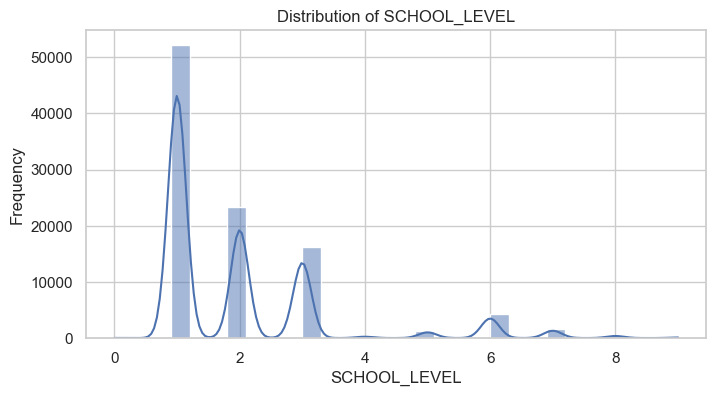

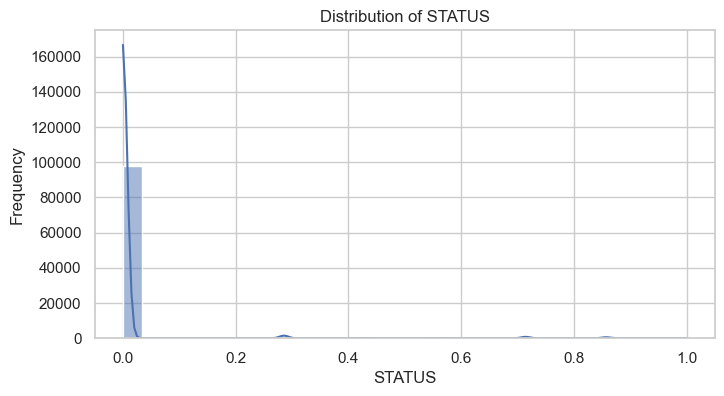

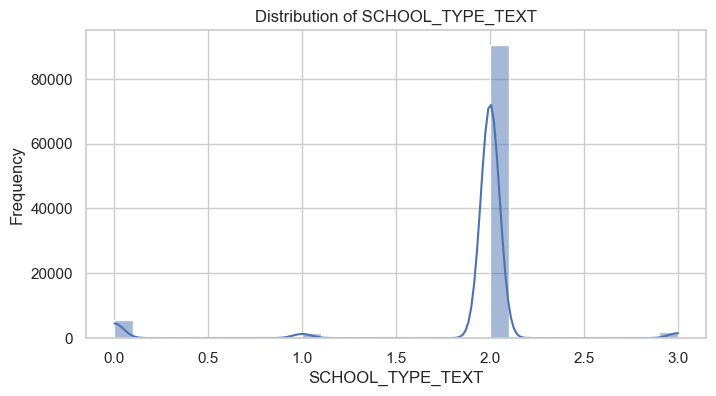

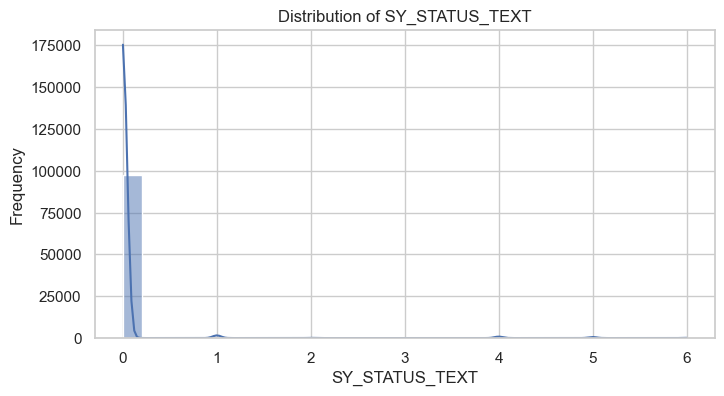

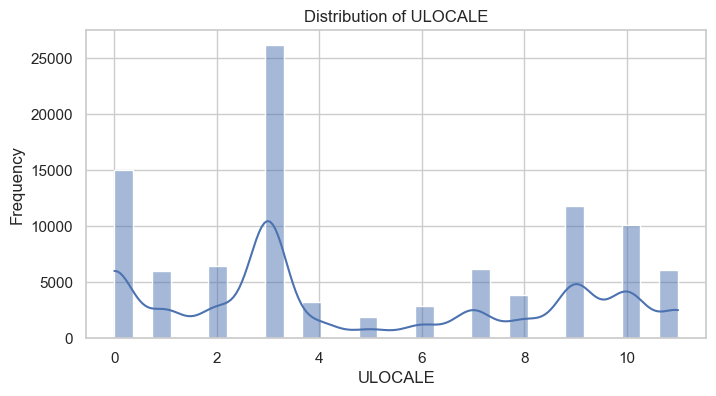

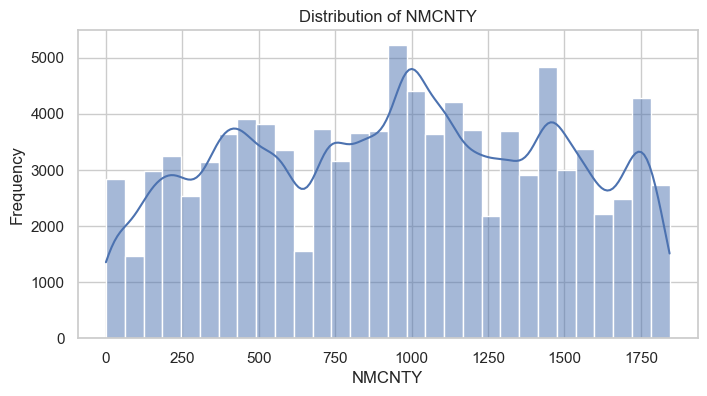

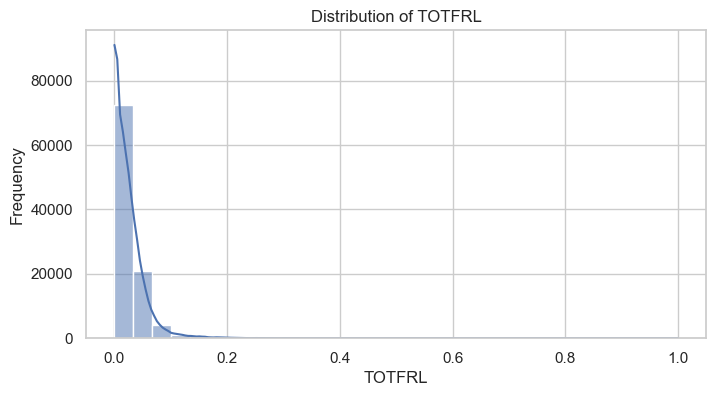

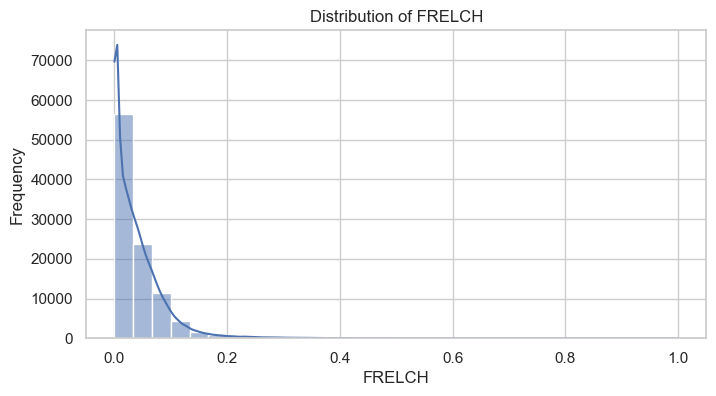

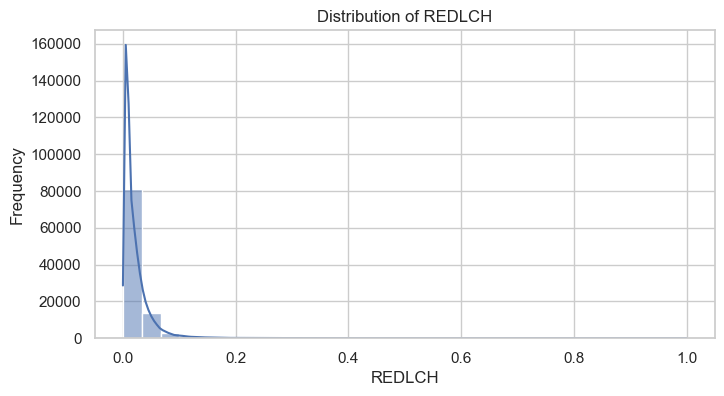

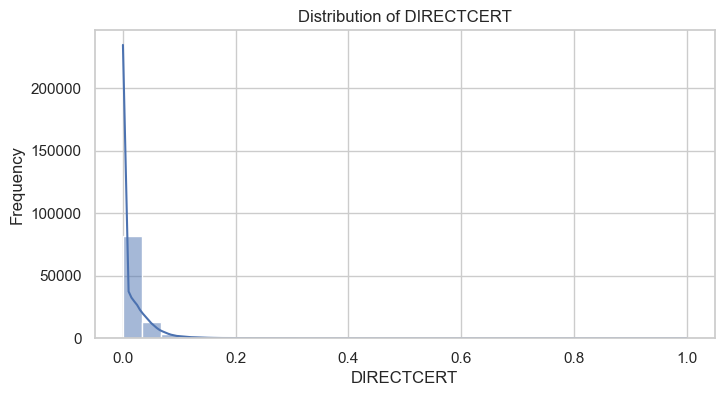

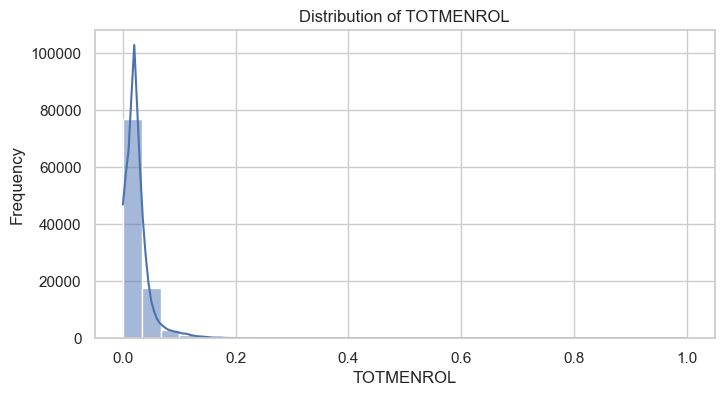

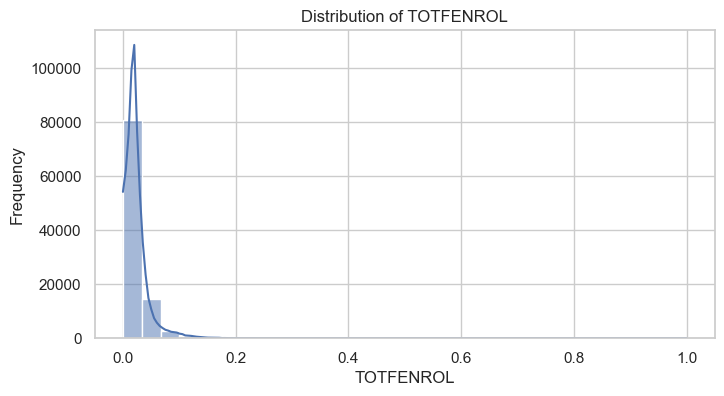

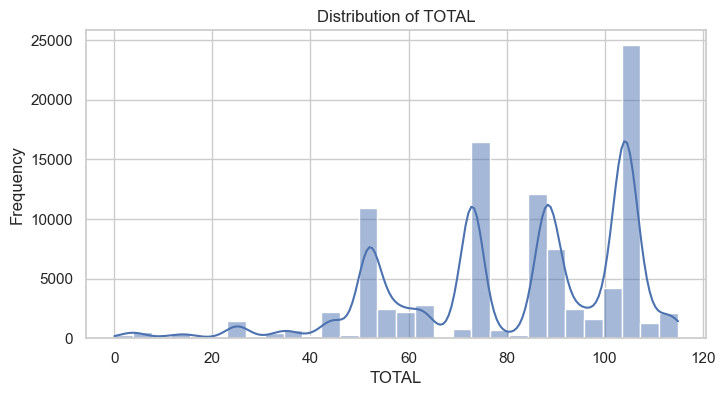

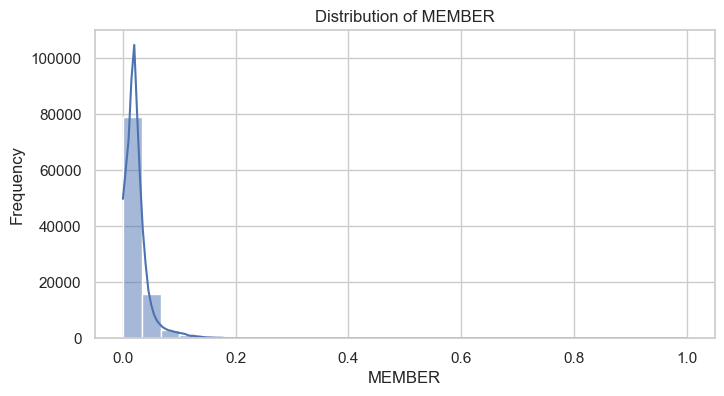

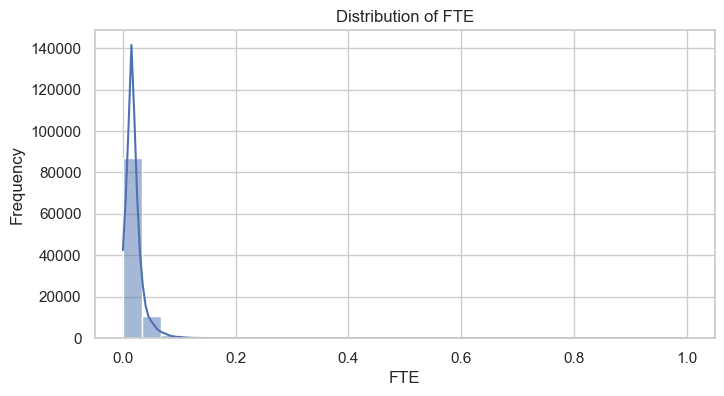

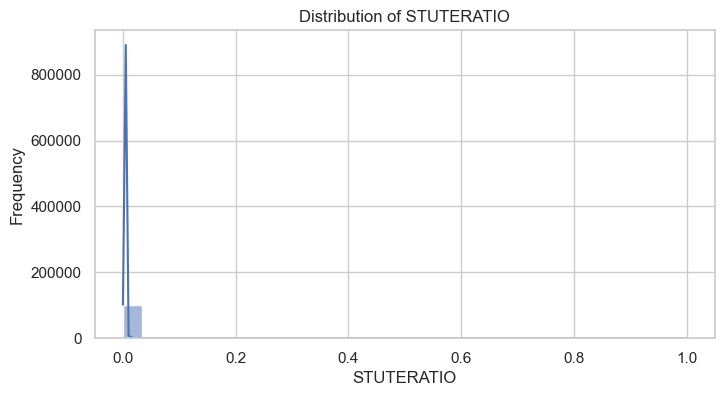

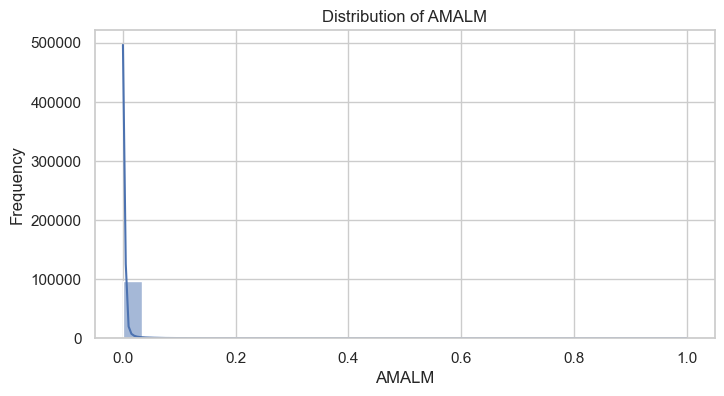

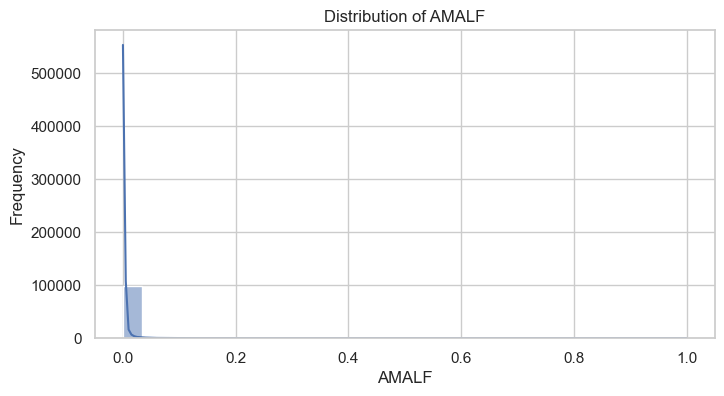

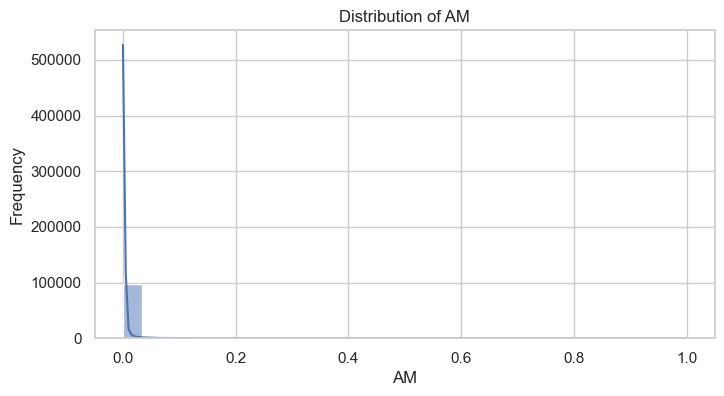

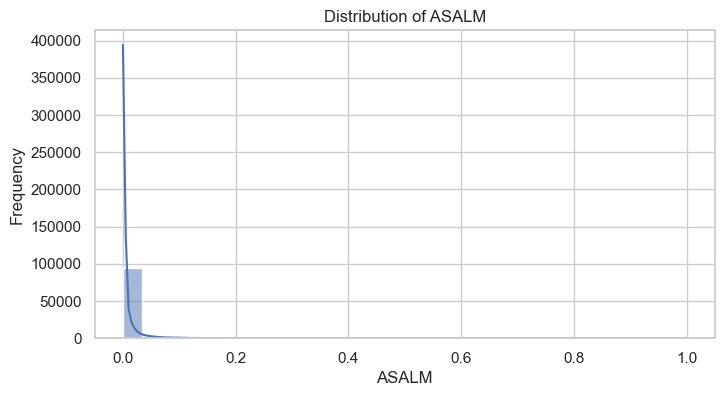

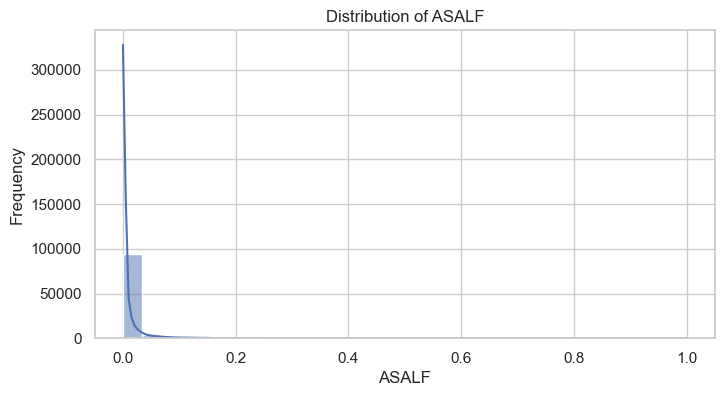

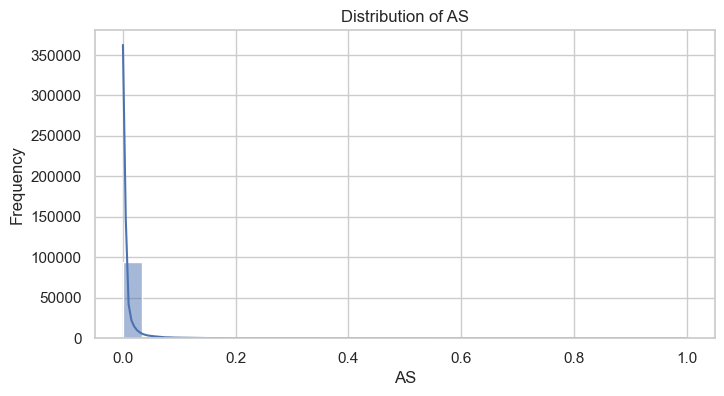

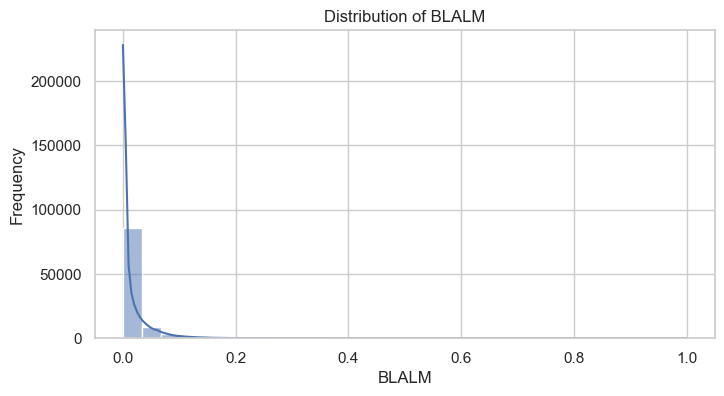

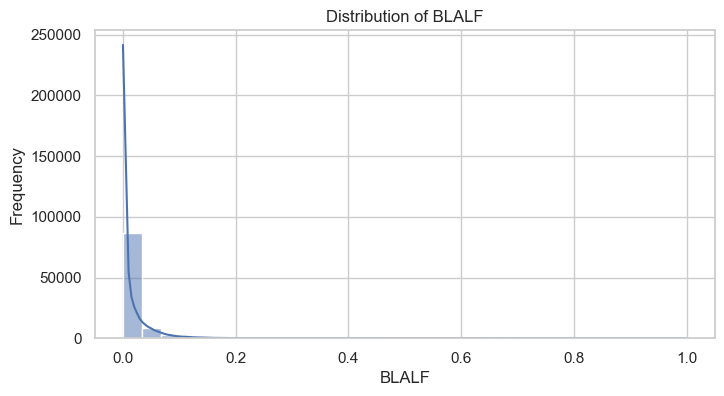

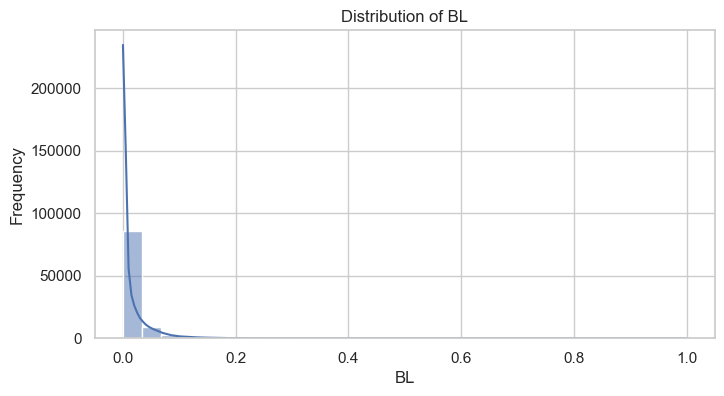

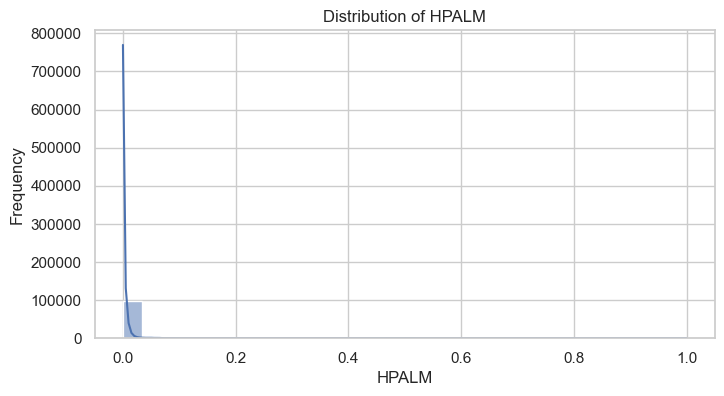

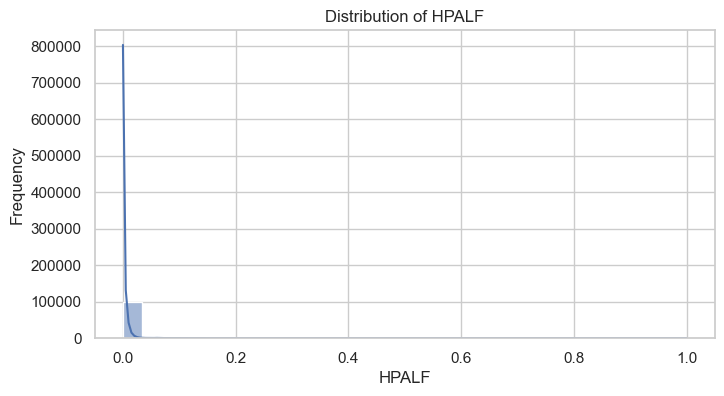

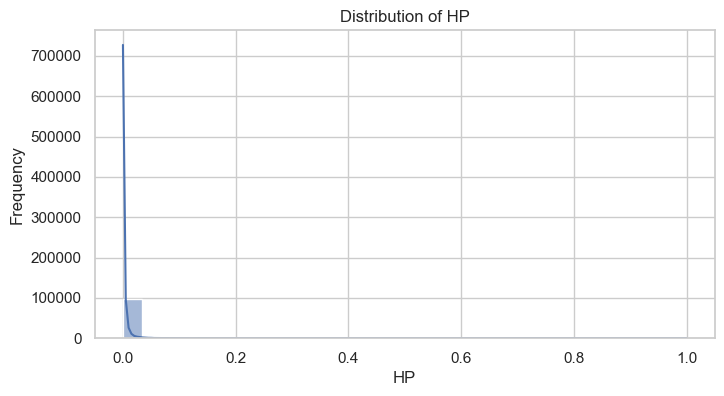

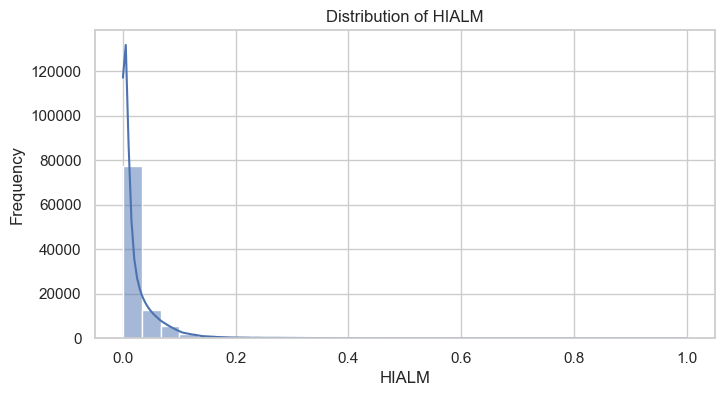

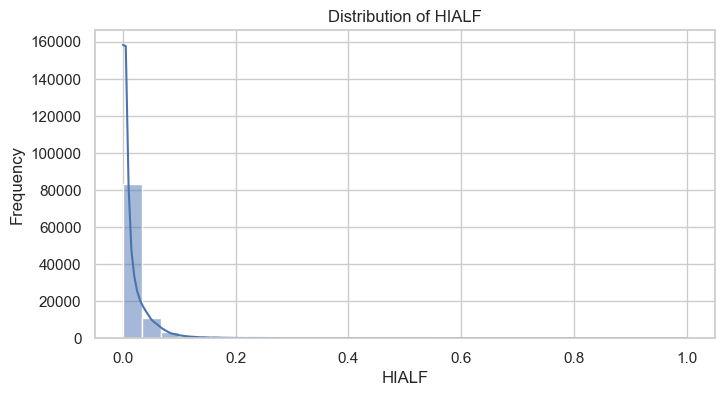

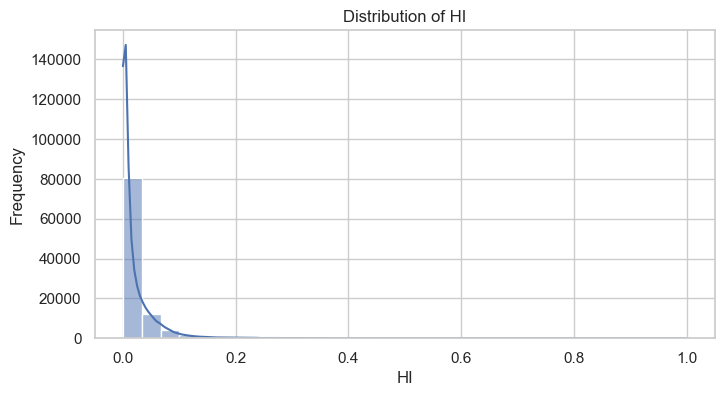

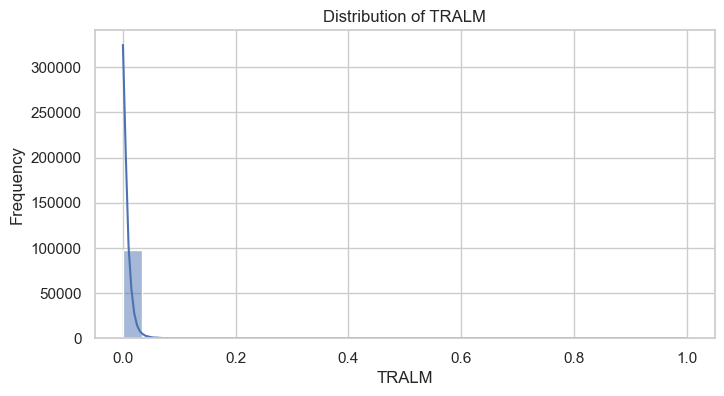

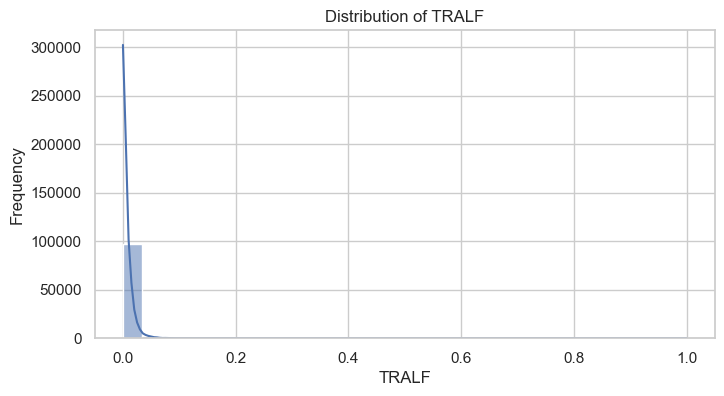

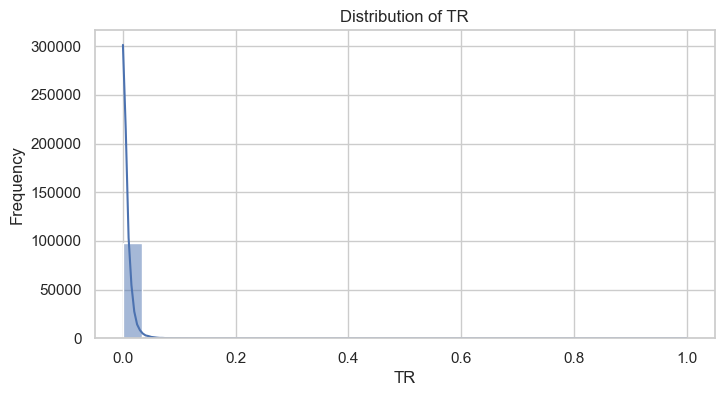

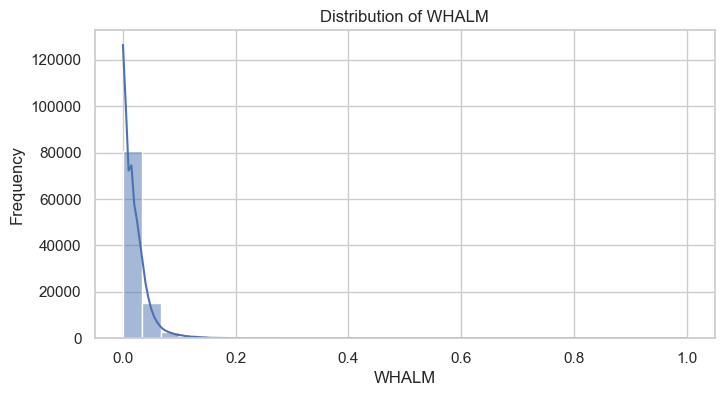

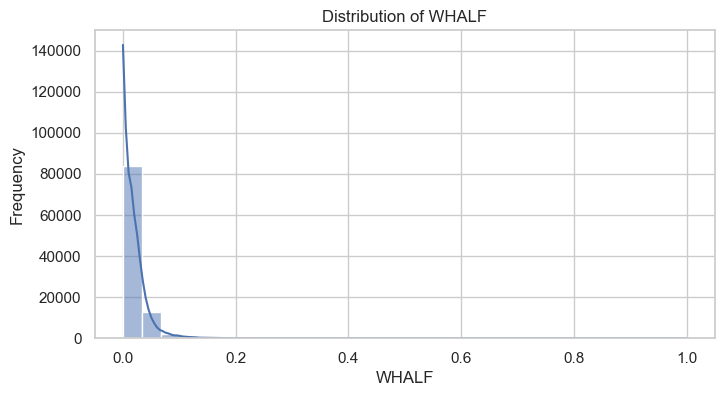

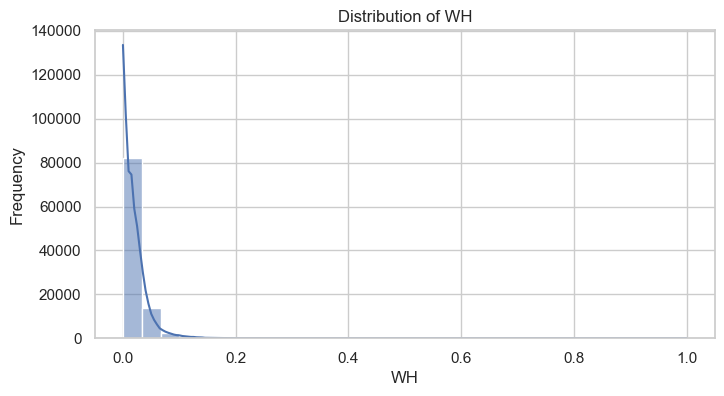

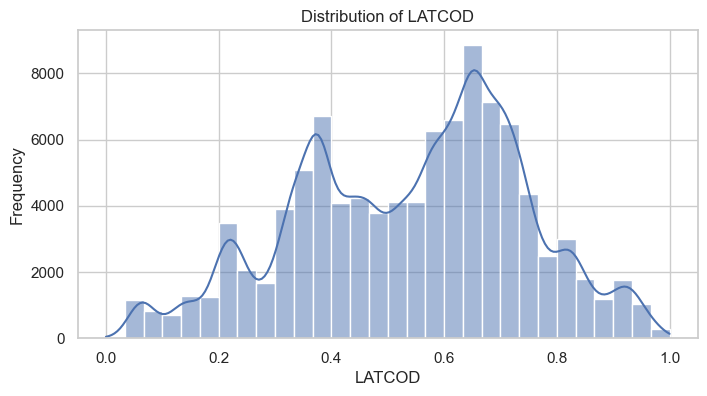

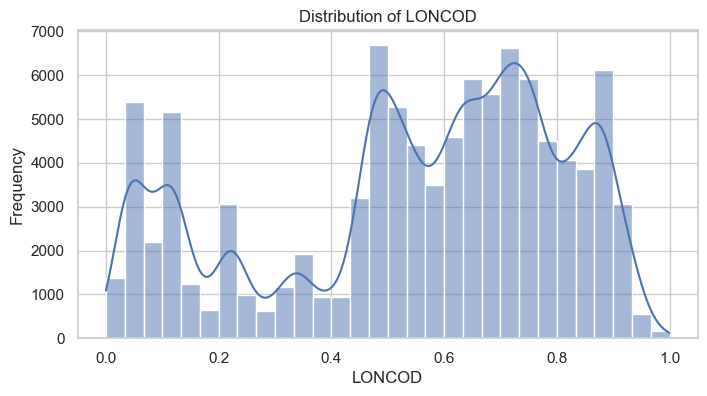

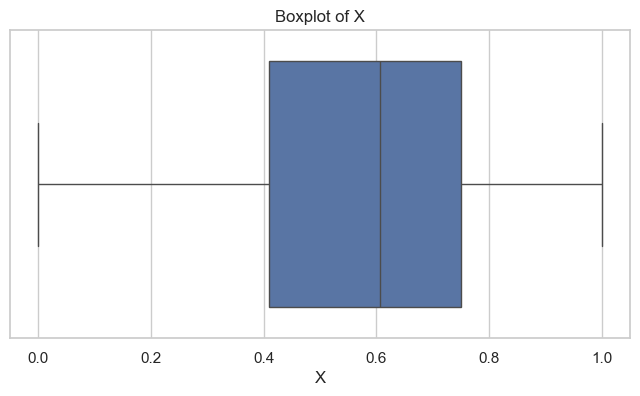

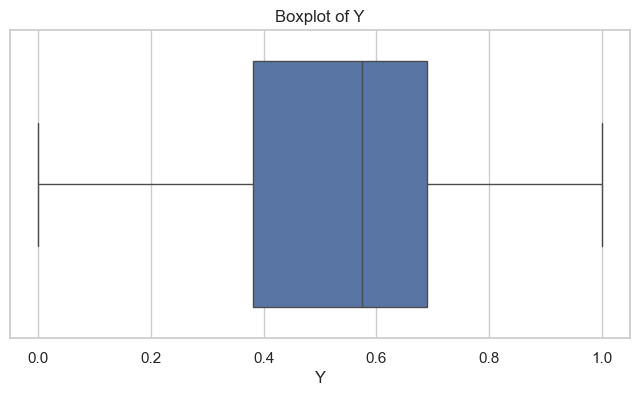

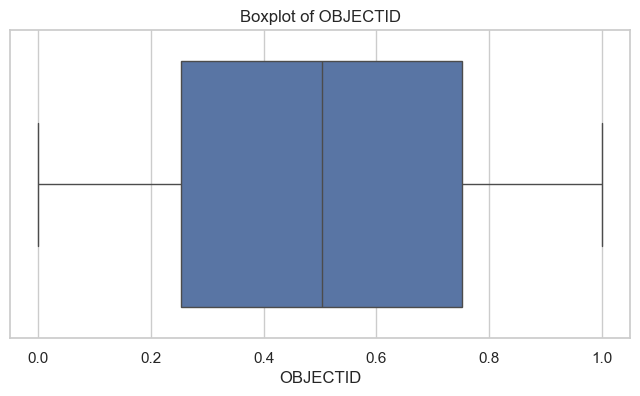

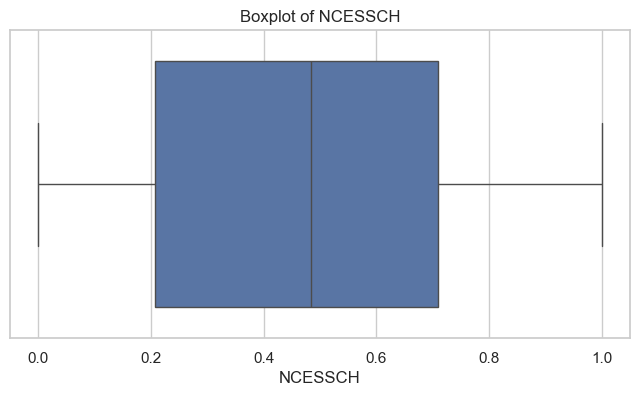

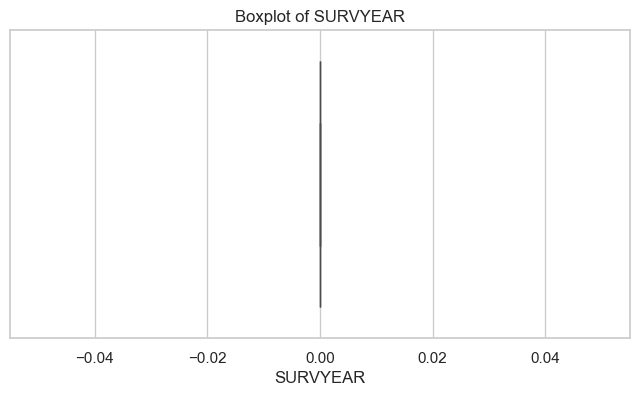

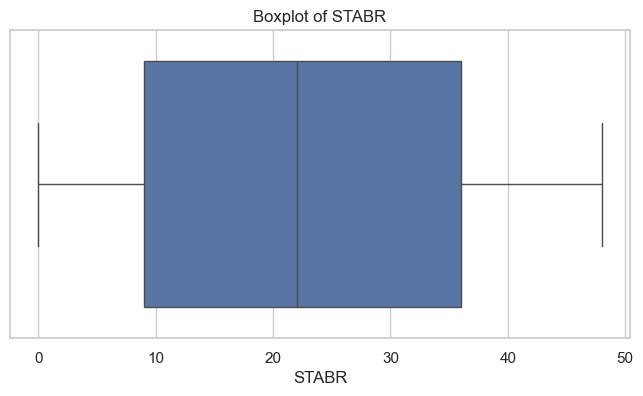

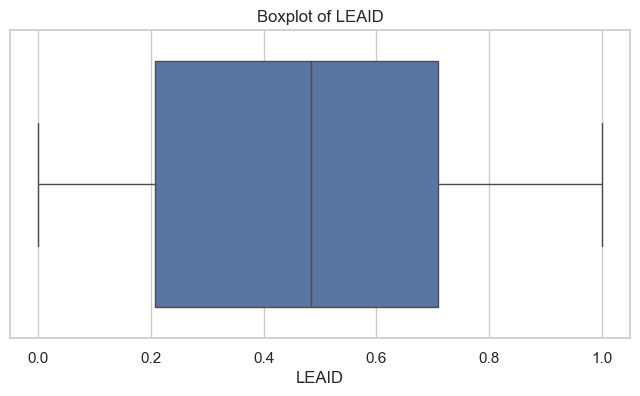

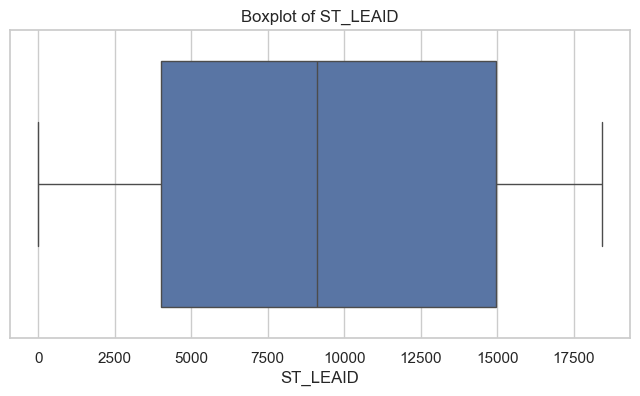

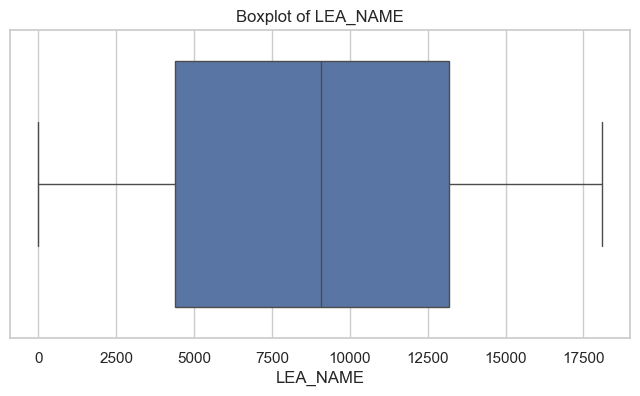

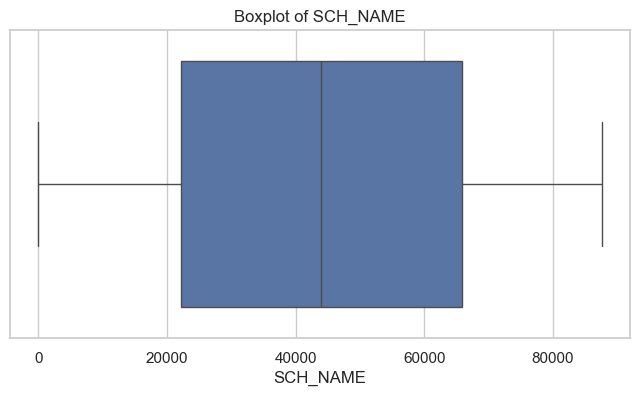

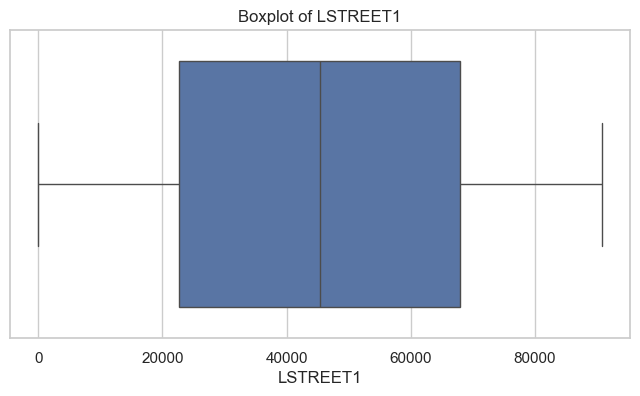

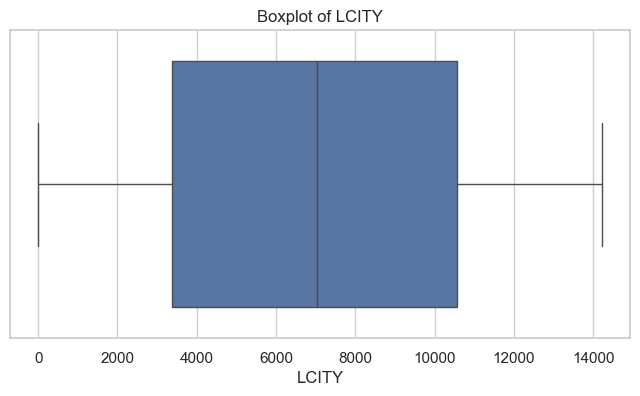

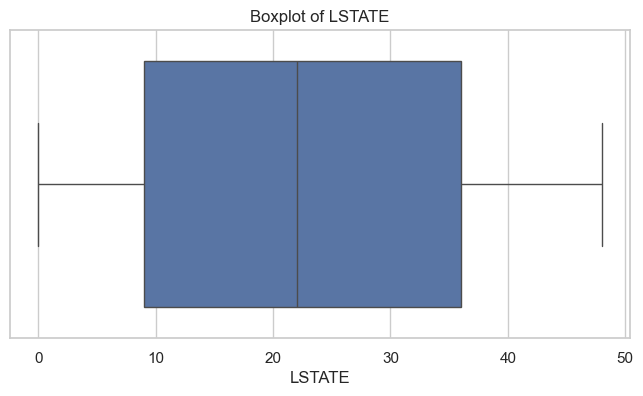

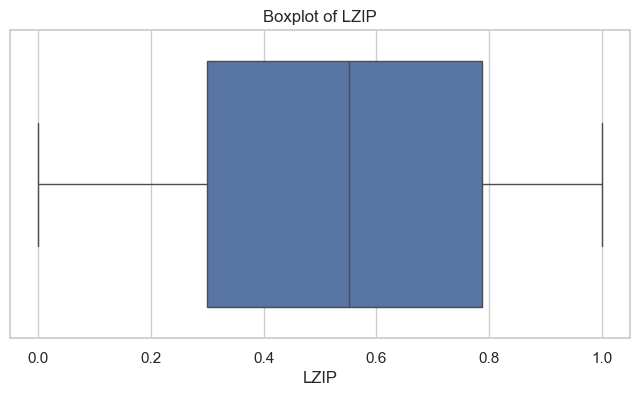

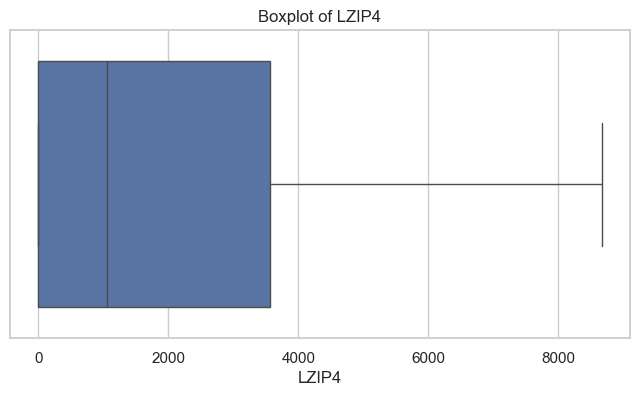

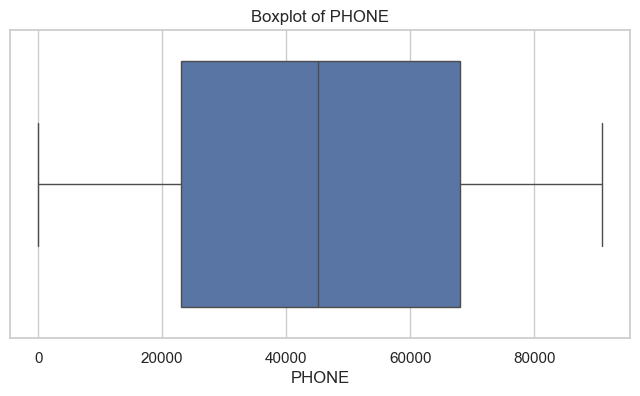

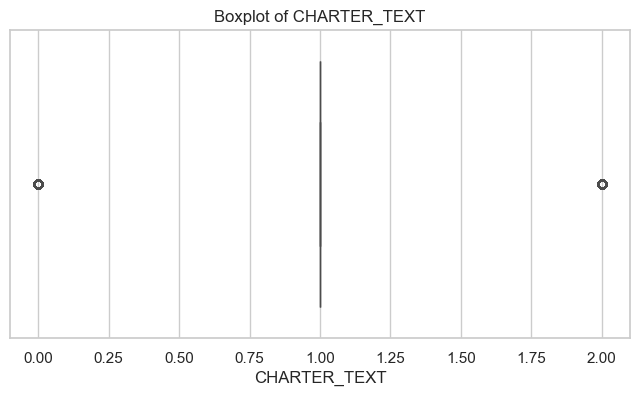

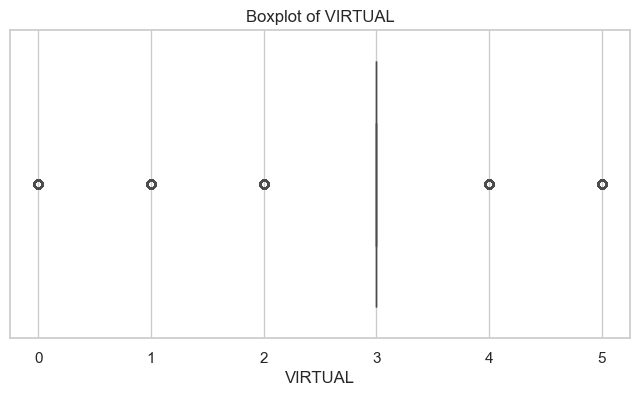

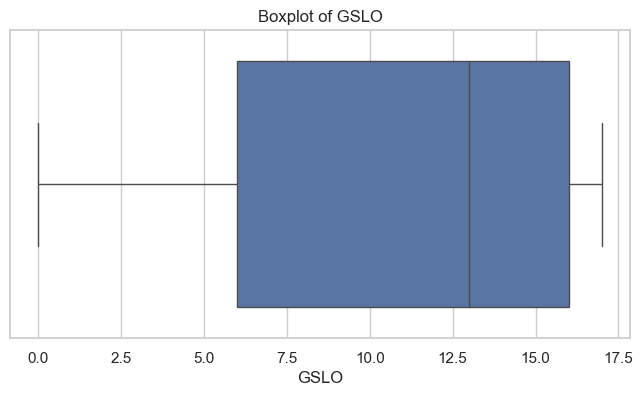

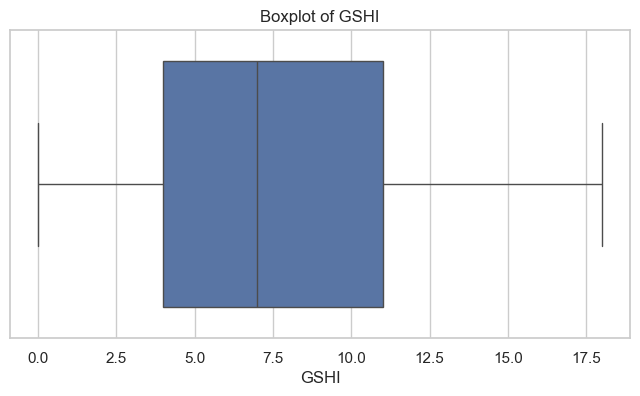

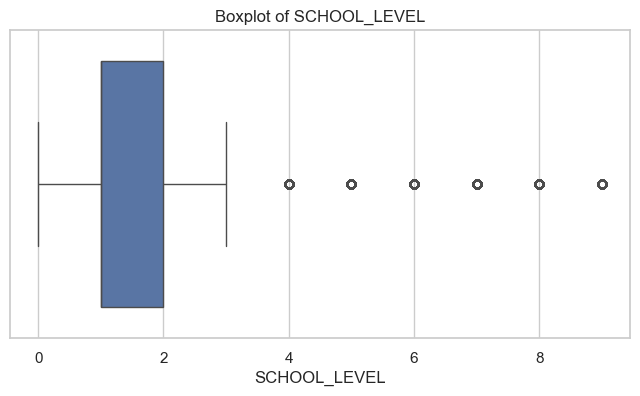

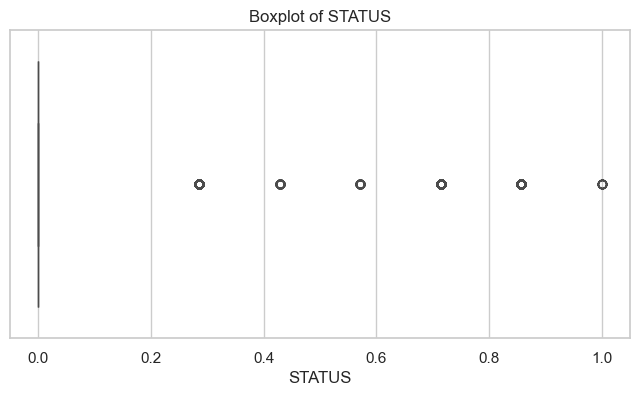

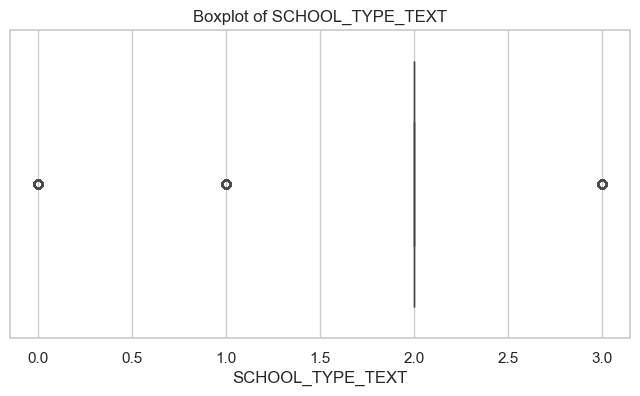

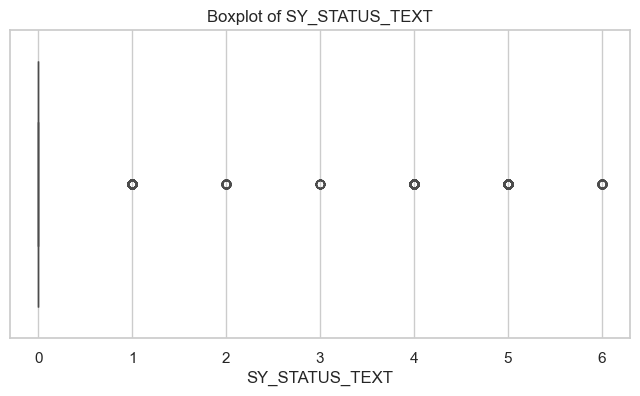

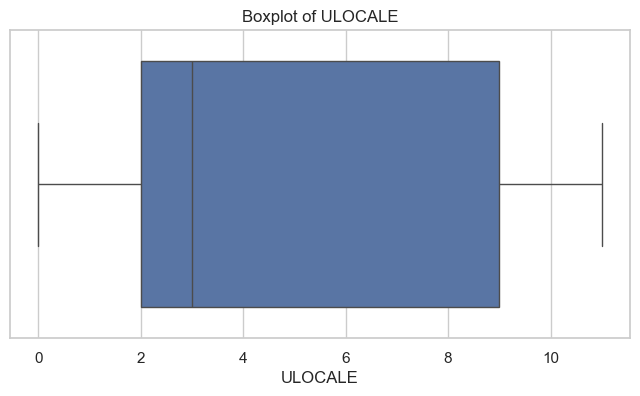

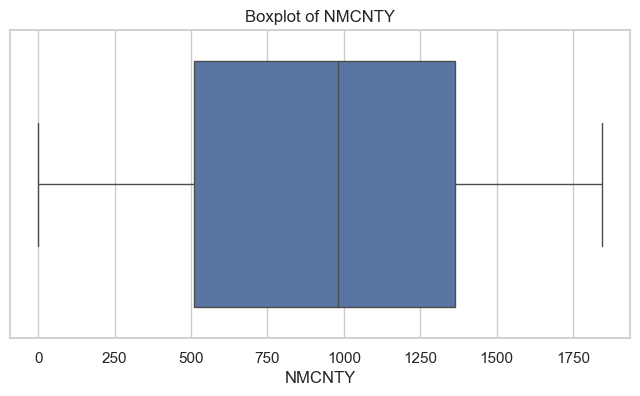

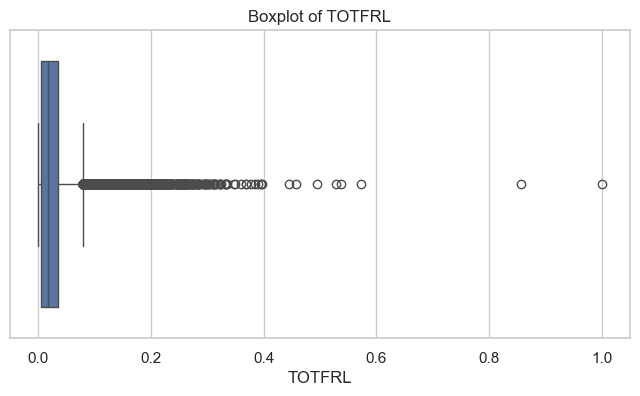

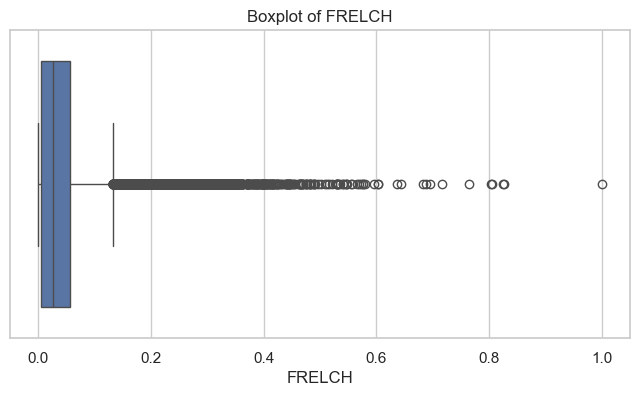

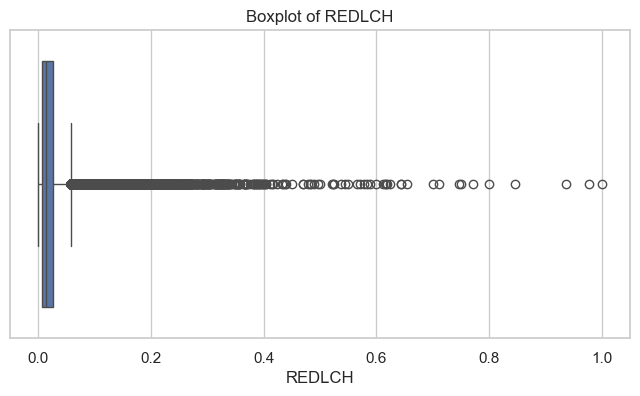

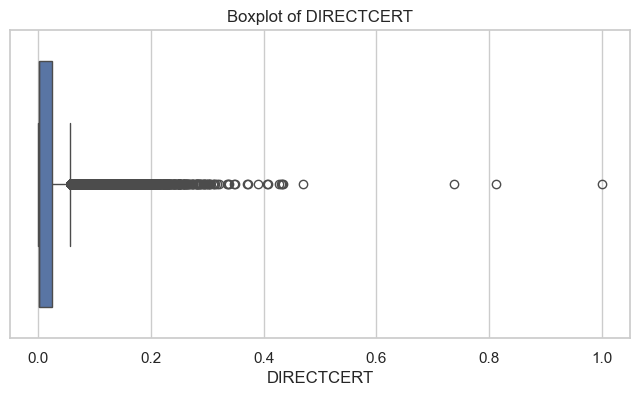

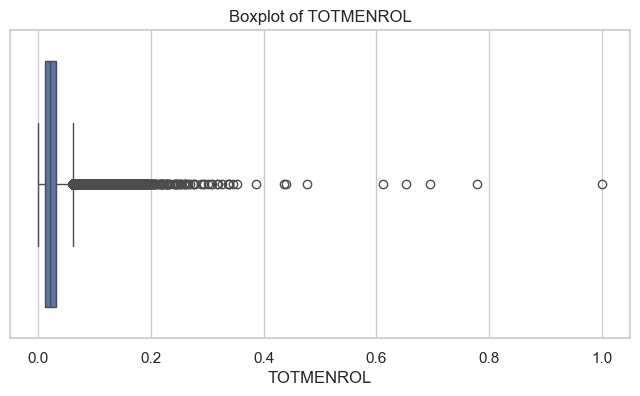

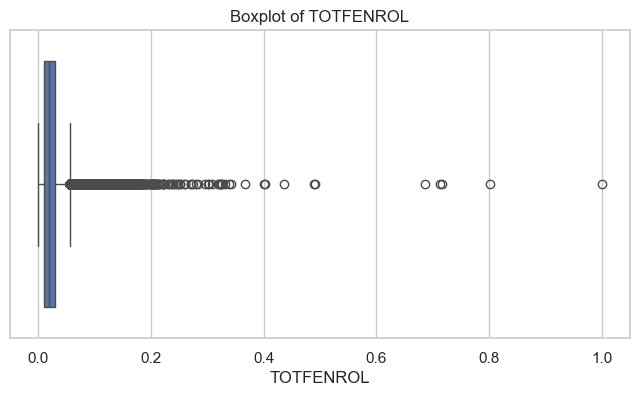

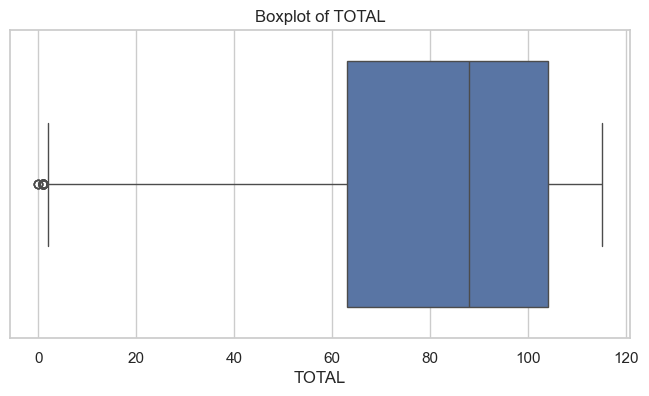

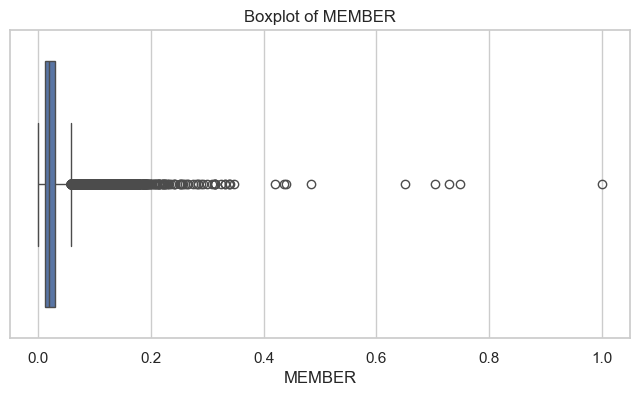

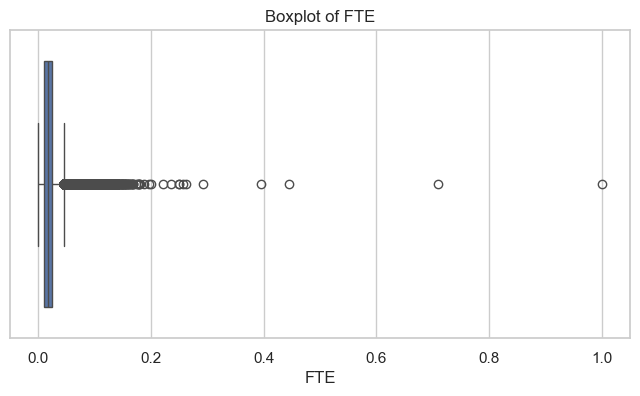

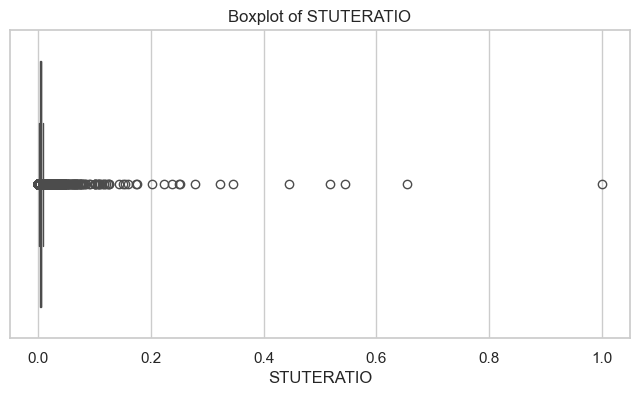

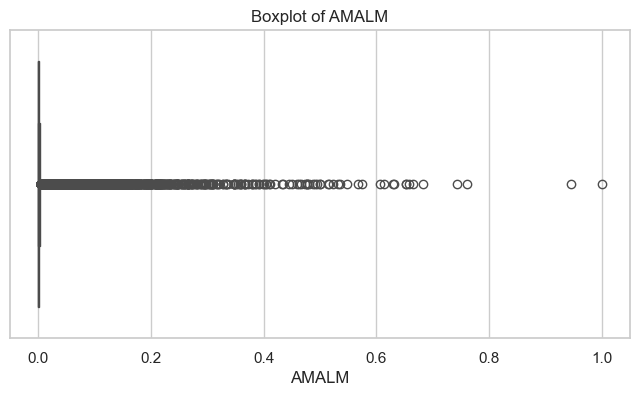

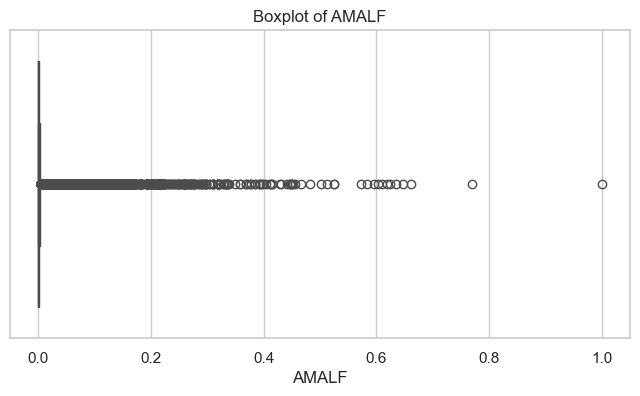

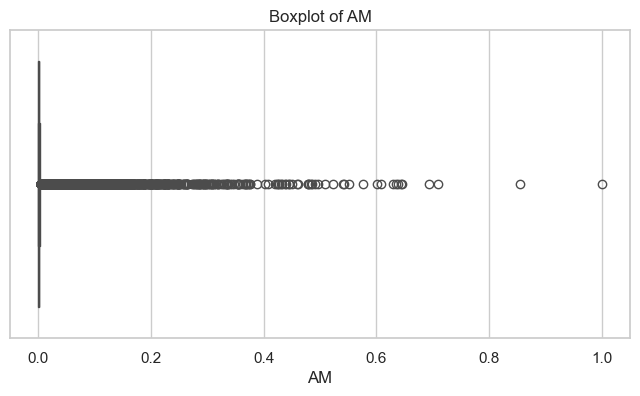

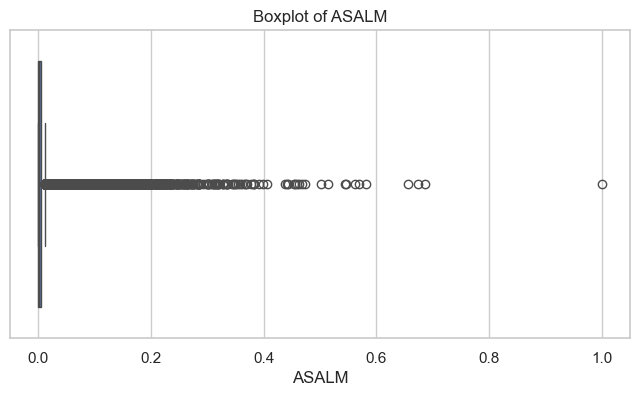

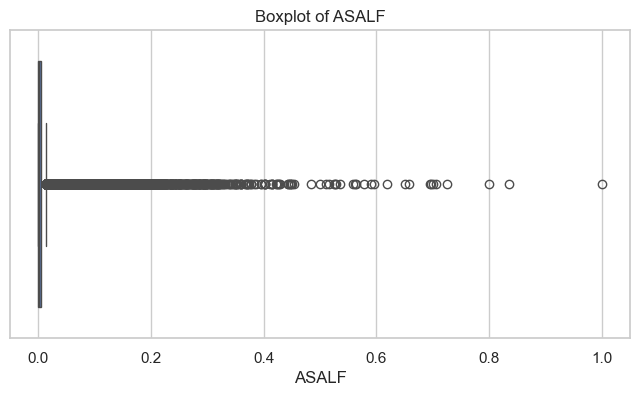

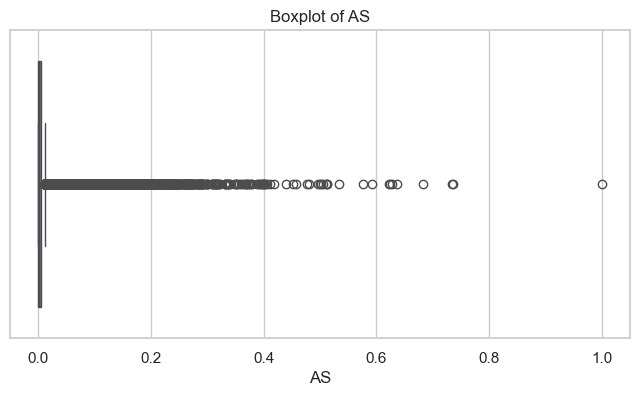

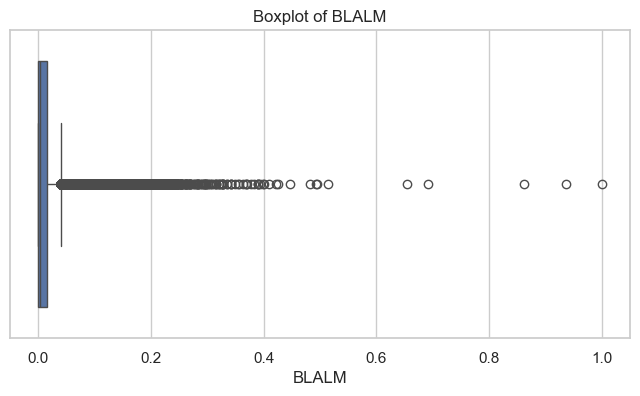

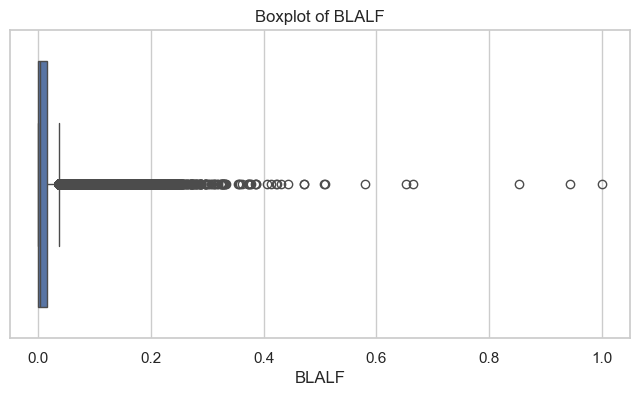

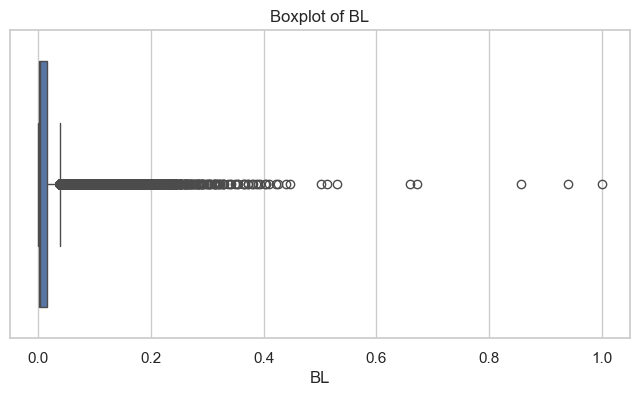

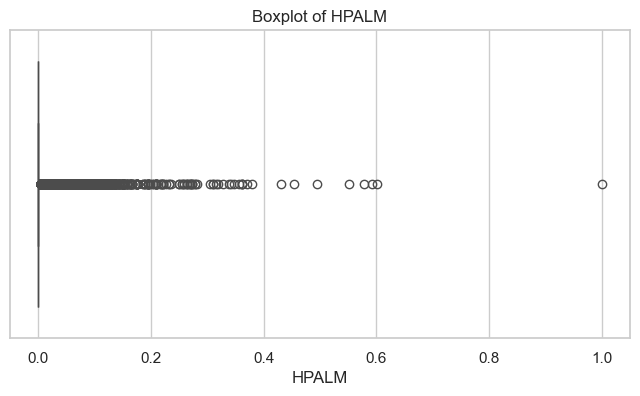

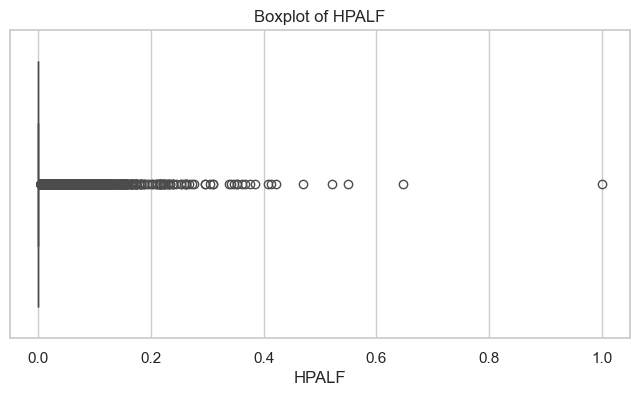

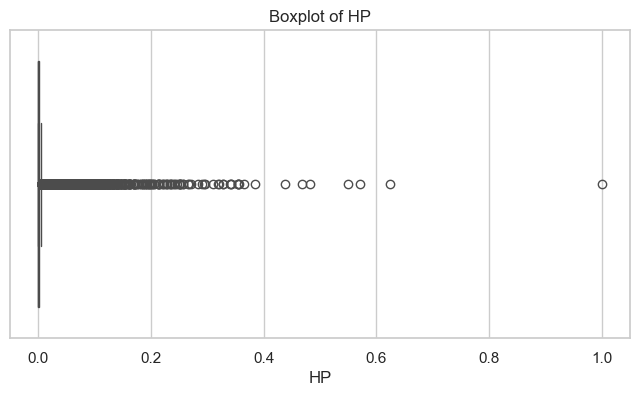

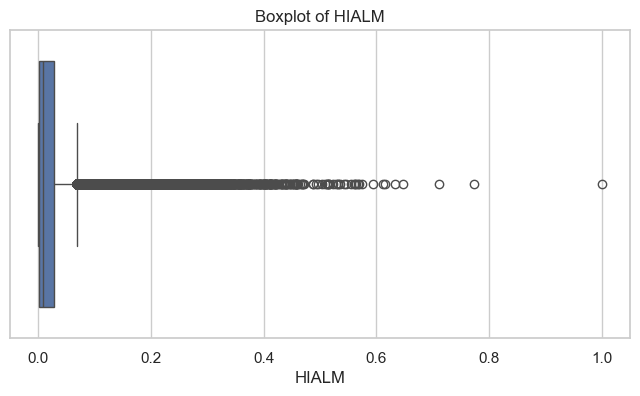

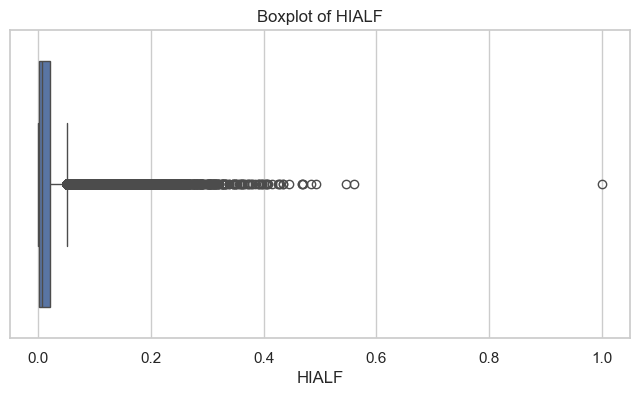

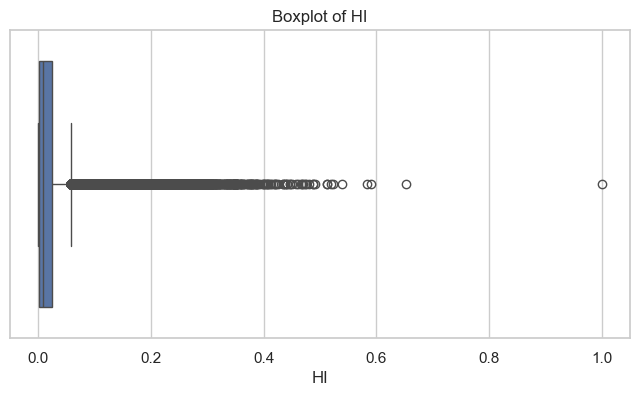

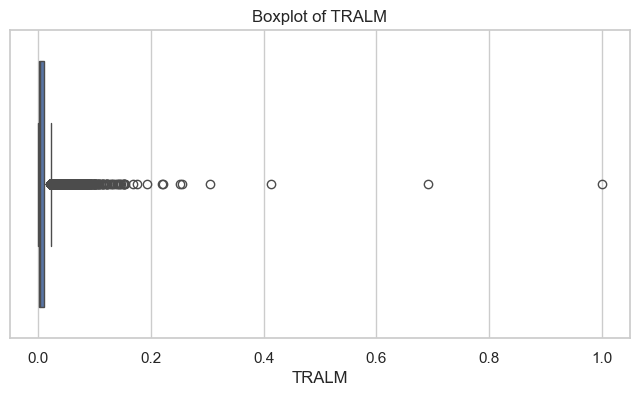

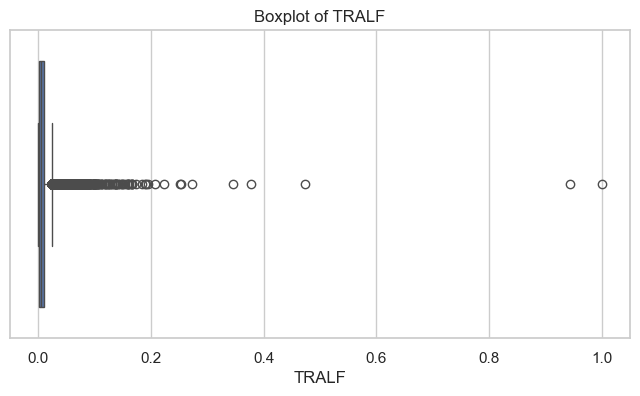

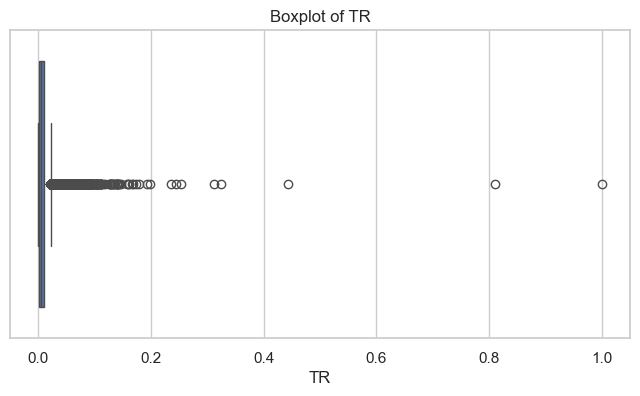

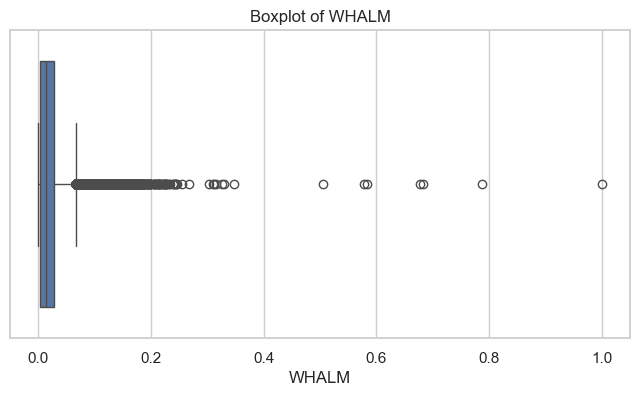

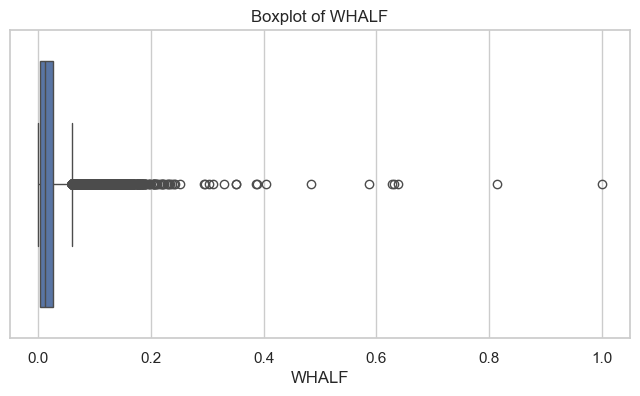

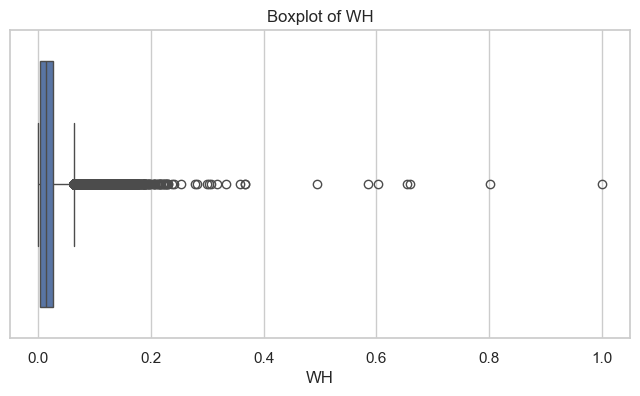

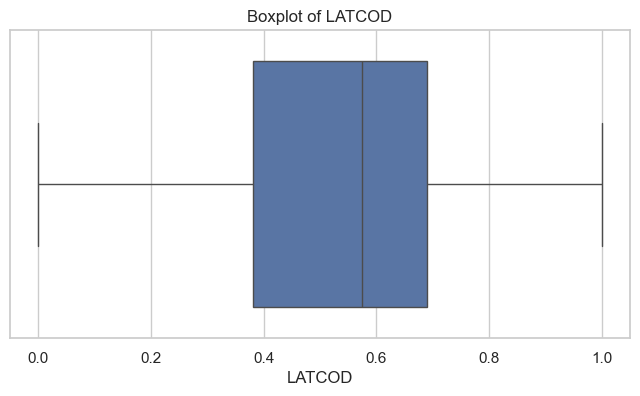

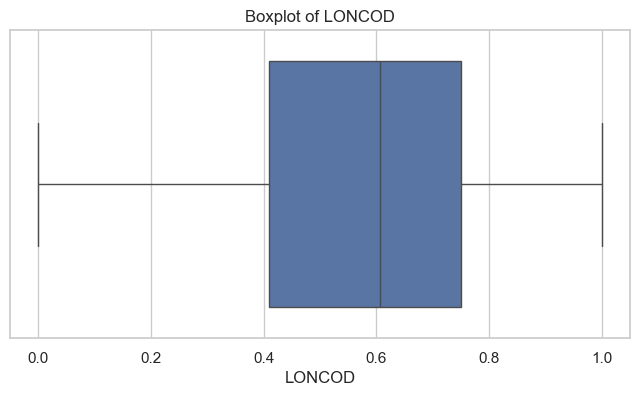

In [67]:
# Step 1: Understanding Data Distribution

# Histogram for numerical columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f"{col}_histogram.png")  # Save as image
    plt.show()

# Boxplot for detecting outliers in key numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.savefig(f"{col}_boxplot.png")  # Save as image
    plt.show()

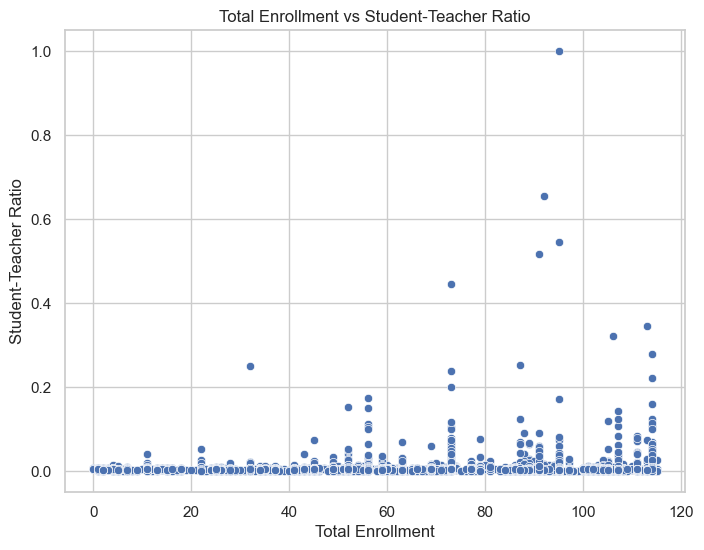

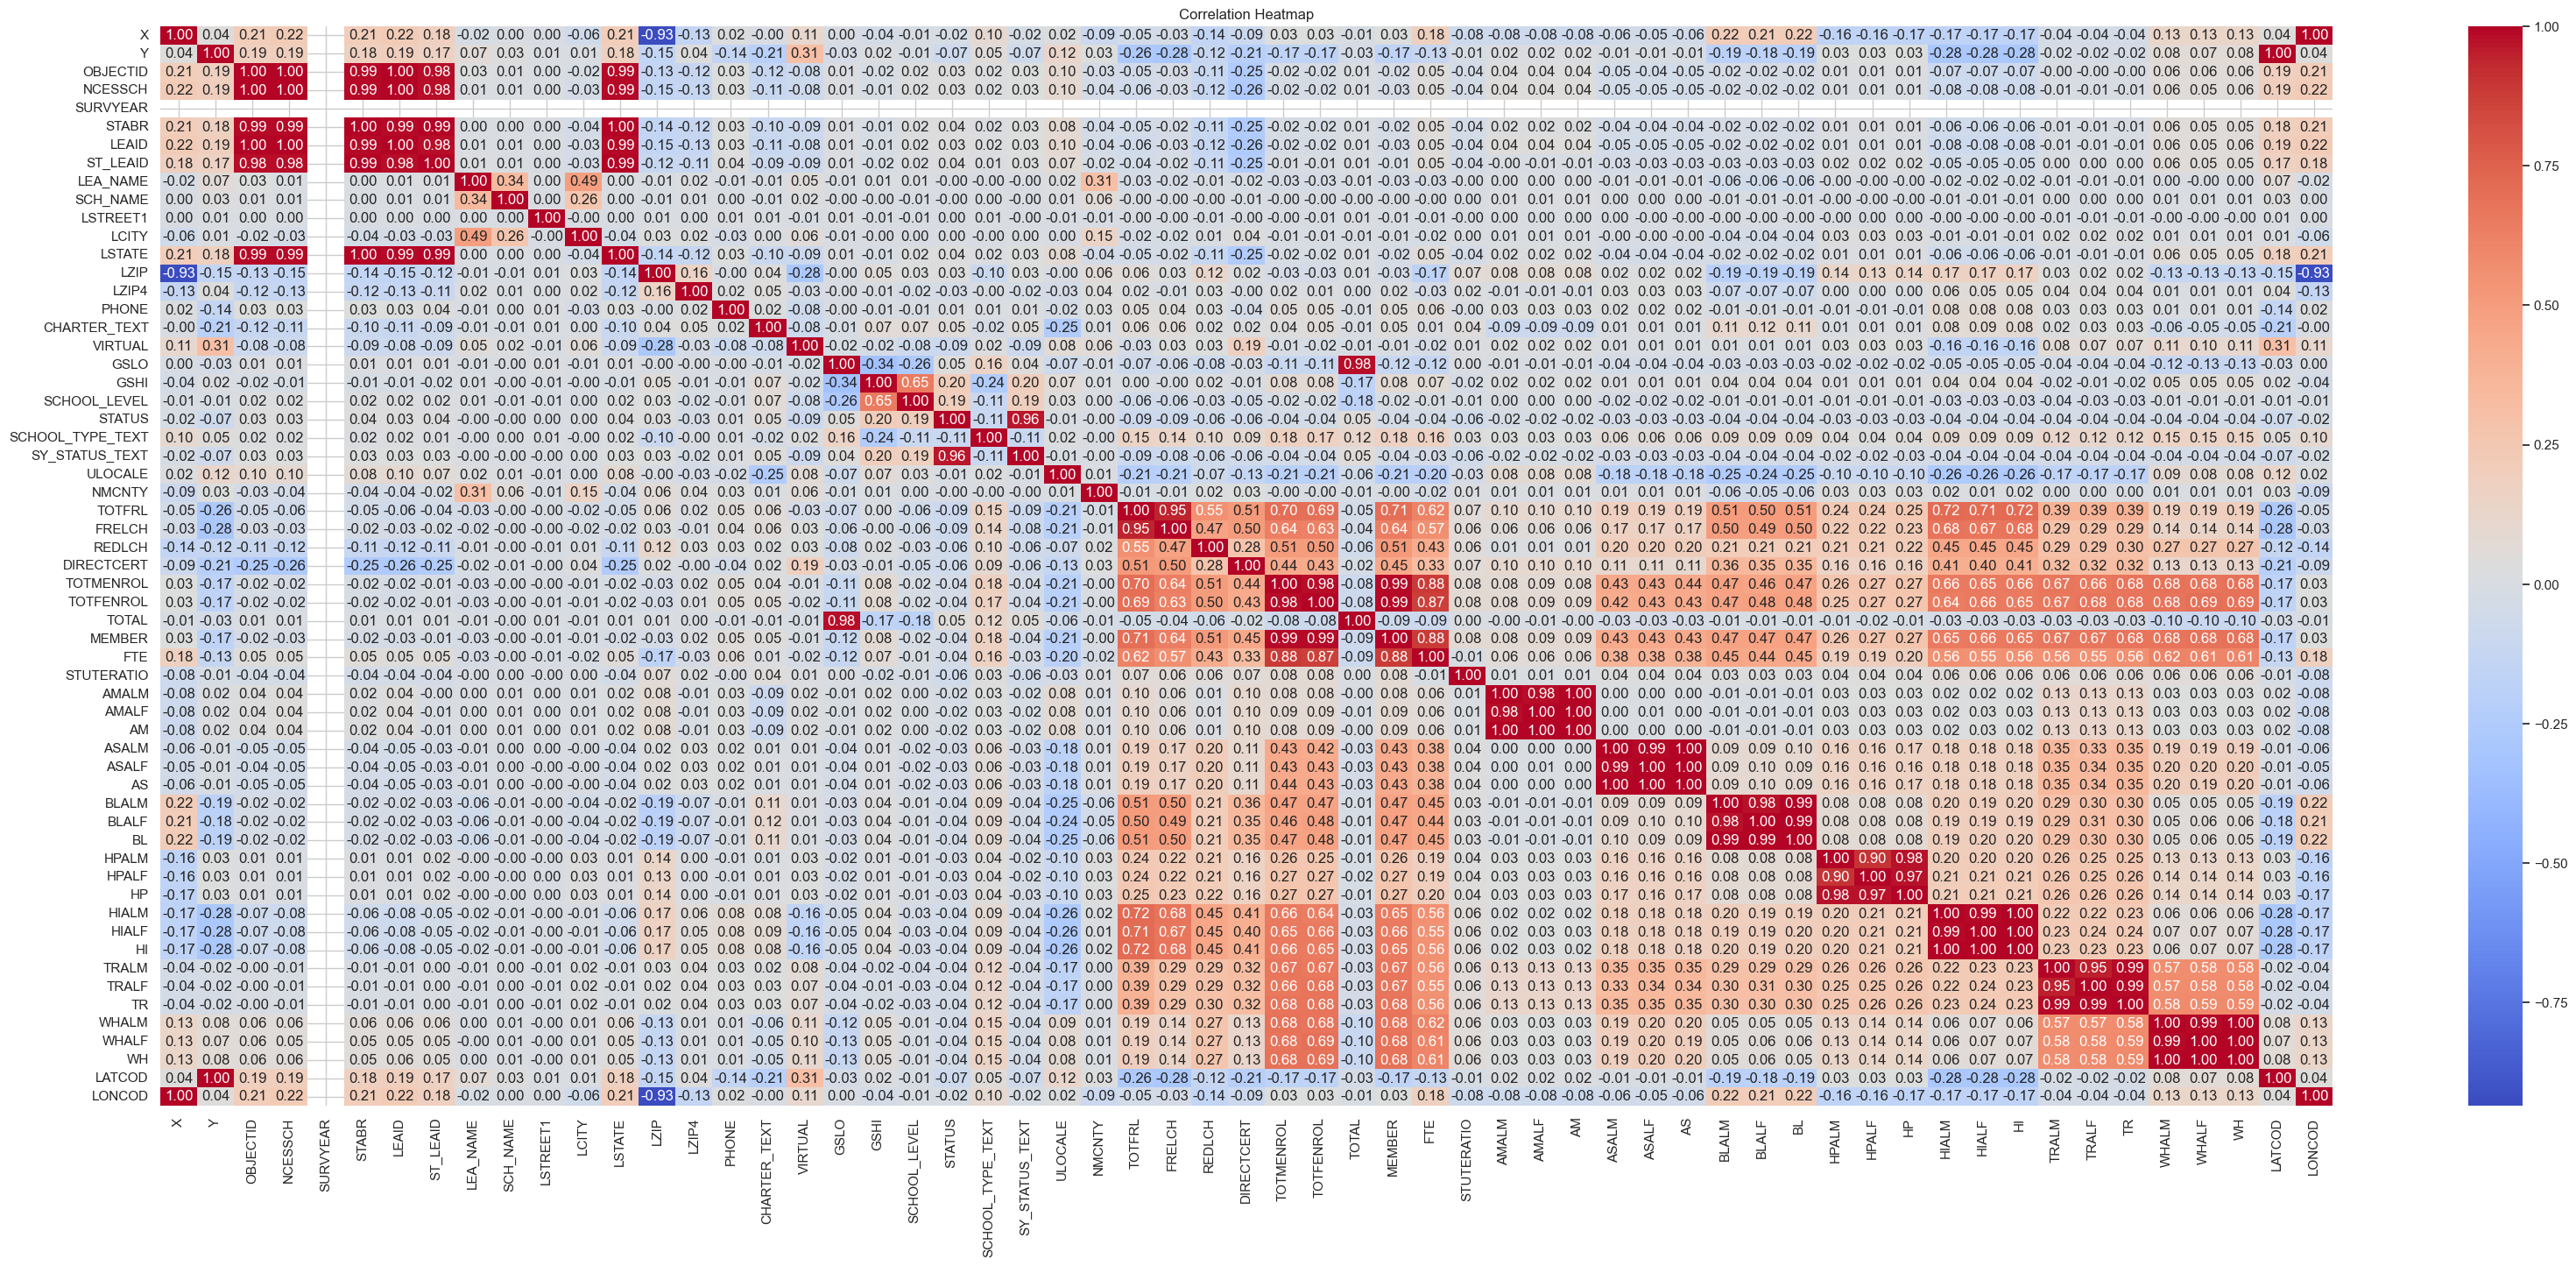

In [79]:
# Step 2: Identifying Relationships

# Scatterplot between enrollment and student-teacher ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['TOTAL'], y=df_cleaned['STUTERATIO'])
plt.title('Total Enrollment vs Student-Teacher Ratio')
plt.xlabel('Total Enrollment')
plt.ylabel('Student-Teacher Ratio')
plt.savefig("enrollment_vs_stut_ratio.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(40, 16))
correlation_matrix = df_cleaned[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

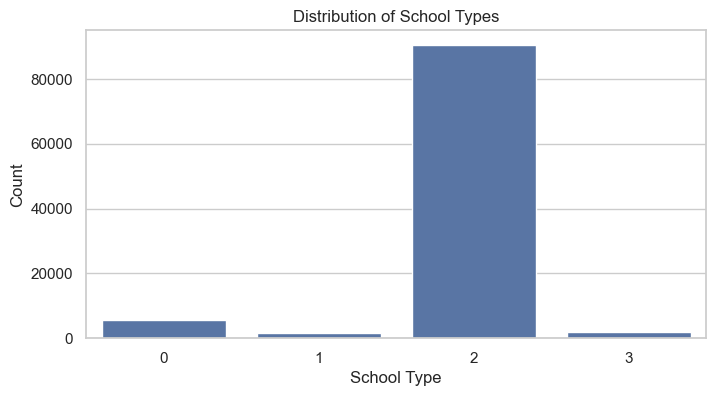

In [85]:
# Step 3: Categorical Data Analysis

# Countplot for school types (assuming categorical encoding)
if 'SCHOOL_TYPE_TEXT' in df_cleaned.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_cleaned['SCHOOL_TYPE_TEXT'])
    plt.title('Distribution of School Types')
    plt.xlabel('School Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.savefig("school_type_distribution.png")
    plt.show()

In [87]:
# Step 4: Statistical Analysis

# Compute correlation with target variables
correlations = df_cleaned.corr()['TOTAL'].sort_values(ascending=False)
correlation_df = pd.DataFrame(correlations).reset_index()
correlation_df.columns = ['Feature', 'Correlation with TOTAL']

correlation_df

Feature  Correlation with TOTAL
0              TOTAL                1.000000
1               GSLO                0.978018
2   SCHOOL_TYPE_TEXT                0.119008
3             STATUS                0.053394
4     SY_STATUS_TEXT                0.052282
5               LZIP                0.009449
6           OBJECTID                0.009405
7           LSTREET1                0.009083
8              LEAID                0.008176
9            NCESSCH                0.008176
10             STABR                0.007347
11            LSTATE                0.007347
12          ST_LEAID                0.005761
13        STUTERATIO                0.002801
14             LZIP4                0.000137
15          SCH_NAME               -0.004591
16                AM               -0.004701
17             AMALM               -0.004937
18      CHARTER_TEXT               -0.005033
19             AMALF               -0.005265
20             PHONE               -0.005518
21             LCITY               -0.008150
22          LEA_NAME               -0.009194
23                 X               -0.010397
24            LONCOD               -0.010397
25             HPALM               -0.013112
26           VIRTUAL               -0.013932
27             BLALM               -0.014178
28                BL               -0.014368
29                HP               -0.014385
30             BLALF               -0.014399
31            NMCNTY               -0.014807
32             HPALF               -0.015003
33        DIRECTCERT               -0.015639
34             TRALM               -0.030793
35             ASALM               -0.031661
36                TR               -0.032080
37                AS               -0.032517
38                 Y               -0.032713
39            LATCOD               -0.032713
40             TRALF               -0.033151
41             ASALF               -0.033204
42             HIALM               -0.033396
43             HIALF               -0.033494
44                HI               -0.033550
45            FRELCH               -0.041614
46            TOTFRL               -0.048472
47           ULOCALE               -0.059691
48            REDLCH               -0.060491
49         TOTMENROL               -0.084442
50         TOTFENROL               -0.084764
51            MEMBER               -0.086192
52               FTE               -0.093095
53             WHALM               -0.103764
54                WH               -0.104618
55             WHALF               -0.104864
56              GSHI               -0.171215
57      SCHOOL_LEVEL               -0.180851
58          SURVYEAR                     NaN

### **4)Advanced Analysis**

In [98]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBRegressor

# Reload the dataset
file_path = "school.csv"
df = pd.read_csv(file_path, low_memory = False)

# Data Cleaning and Preparation

# Drop columns with excessive missing values (>90% missing)
threshold = 0.9 * len(df)
df_cleaned = df.dropna(axis=1, thresh=threshold).copy()

# Impute missing values
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Fill missing values: Numeric with median, Categorical with mode
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Remove Duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Standardizing Zip Codes (ensuring 5-digit format)
df_cleaned['LZIP'] = df_cleaned['LZIP'].astype(str).str.zfill(5)

# Filtering out invalid latitude and longitude values
df_cleaned = df_cleaned[
    df_cleaned['LATCOD'].between(24, 50) & df_cleaned['LONCOD'].between(-125, -65)
]

# Ensuring total enrollment matches sum of grade-level enrollments (using available columns)
existing_grade_columns = [col for col in df_cleaned.columns if col.startswith('G')]
if existing_grade_columns:
    df_cleaned['TOTAL'] = df_cleaned[existing_grade_columns].sum(axis=1)

# Feature Importance Analysis

# Selecting relevant features (excluding ID columns and target variable)
feature_cols = [col for col in df_cleaned.columns if col not in ['TOTAL', 'OBJECTID', 'NCESSCH', 'LEAID']]
X = df_cleaned[feature_cols]
y = df_cleaned['TOTAL']

# Train an optimized Random Forest model (Reduced estimators and single-threading to avoid issues)
rf_model = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=1)
rf_model.fit(X, y)

# Extract feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

Feature    Importance
15              GSLO  5.738469e-01
16              GSHI  3.467916e-01
17      SCHOOL_LEVEL  7.934793e-02
19  SCHOOL_TYPE_TEXT  4.461248e-06
26        DIRECTCERT  2.633733e-06
14           VIRTUAL  6.571181e-07
8              LCITY  6.289310e-07
0                  X  3.783289e-07
12             PHONE  3.066317e-07
30               FTE  2.922450e-07
6           SCH_NAME  2.700504e-07
5           LEA_NAME  2.582041e-07
40                BL  2.262406e-07
7           LSTREET1  2.022342e-07
52                WH  2.006716e-07
10              LZIP  1.956416e-07
27         TOTMENROL  1.838045e-07
22            NMCNTY  1.759153e-07
28         TOTFENROL  1.734243e-07
51             WHALF  1.678471e-07
54            LONCOD  1.612587e-07
49                TR  1.604135e-07
29            MEMBER  1.535614e-07
4           ST_LEAID  1.512929e-07
24            FRELCH  1.331663e-07
31        STUTERATIO  1.207757e-07
21           ULOCALE  1.130263e-07
23            TOTFRL  1.075501e-07
46                HI  1.074711e-07
53            LATCOD  8.944717e-08
50             WHALM  8.145717e-08
25            REDLCH  7.232097e-08
9             LSTATE  7.076977e-08
44             HIALM  6.390142e-08
48             TRALF  6.163147e-08
1                  Y  5.986125e-08
11             LZIP4  5.730595e-08
3              STABR  5.295176e-08
37                AS  5.206733e-08
47             TRALM  4.761112e-08
39             BLALF  4.631082e-08
45             HIALF  2.587908e-08
38             BLALM  2.398639e-08
42             HPALF  2.071754e-08
34                AM  1.814906e-08
36             ASALF  1.729239e-08
35             ASALM  1.446467e-08
13      CHARTER_TEXT  1.248305e-08
43                HP  0.000000e+00
41             HPALM  0.000000e+00
18            STATUS  0.000000e+00
33             AMALF  0.000000e+00
32             AMALM  0.000000e+00
2           SURVYEAR  0.000000e+00
20    SY_STATUS_TEXT  0.000000e+00

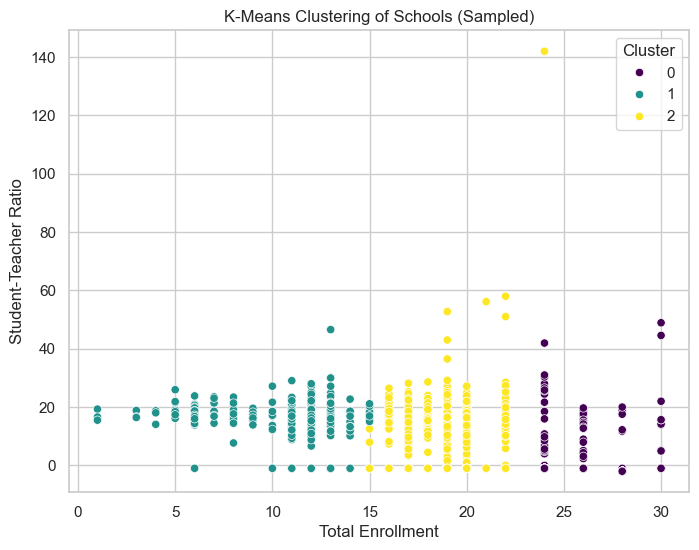

Metric     Value
0  Mean Absolute Error  0.433003
1   Mean Squared Error  0.456622
2            R-Squared  0.978184

In [110]:
# Checking available numeric columns
available_numeric_cols = df_sampled.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Adjusting clustering features to include only existing columns
clustering_features = [col for col in ['TOTAL', 'STUTERATIO', 'FTE'] if col in available_numeric_cols]

# Selecting relevant numeric columns for clustering
df_cluster = df_sampled[clustering_features].dropna()

# Normalize data for clustering
scaler = MinMaxScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_sampled['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sampled['TOTAL'], y=df_sampled['STUTERATIO'], hue=df_sampled['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Schools (Sampled)')
plt.xlabel('Total Enrollment')
plt.ylabel('Student-Teacher Ratio')
plt.legend(title="Cluster")
plt.savefig("fixed_school_clusters.png")
plt.show()

# Proceeding with predictive modeling

# Selecting relevant features (excluding ID columns and target variable)
feature_cols = [col for col in df_sampled.columns if col not in ['TOTAL', 'OBJECTID', 'NCESSCH', 'LEAID']]
X = df_sampled[feature_cols]
y = df_sampled['TOTAL']

# Convert 'LZIP' to numeric (handling any conversion errors)
if 'LZIP' in df_sampled.columns:
    df_sampled['LZIP'] = pd.to_numeric(df_sampled['LZIP'], errors='coerce')

# Selecting relevant features (excluding ID columns and target variable)
feature_cols = [col for col in df_sampled.columns if col not in ['TOTAL', 'OBJECTID', 'NCESSCH', 'LEAID']]
X = df_sampled[feature_cols]
y = df_sampled['TOTAL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=20, learning_rate=0.1, random_state=42)  # Reduced estimators
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Model Performance
model_performance = pd.DataFrame({
    "Metric": ["Mean Absolute Error", "Mean Squared Error", "R-Squared"],
    "Value": [mae, mse, r2]
})
model_performance